# Tratamento & EDA

<p align="center">
  <img src="img/passos_magicos_logo.png" alt="Passos Mágicos logo" width="150"/>
</p>

O projeto foi construído a partir da base de dados no formato `csv` fornecida pela [**Associação Passos Mágicos**](https://passosmagicos.org.br), com os anos de 2020 a 2022. Os conceitos aplicados se baseiam na Pesquisa Extensiva do Desenvolvimento Educacional (PEDE) da Passos Mágicos, realizada anualmente por Dario Rodrigues da Silva em conjunto com a Associação.

# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# Teste de normalidade
from scipy.stats import shapiro

# Funções criadas para o projeto
from utils import *

# Mostrar todas as colunas
pd.set_option('display.max_columns', None)

# Dados

## Variáveis do Dataset

- `NOME_ALUNO`: Nome do Aluno (dados estão anonimizados).
- `IDADE_ALUNO`: Idade do Aluno.
- `INSTITUICAO_ENSINO_ALUNO`: Instituição de Ensino do Aluno.
- `ANOS_NA_PM`: Tempo (Em Anos) que o Alunos esta na Passos Mágicos.<br>
    *Em 2020, coluna FASE_TURMA é utilizada. A partir de 2021, FASE e TURMA se tornam colunas separadas.*
- `FASE_TURMA`: Fase e Turma do Aluno na Passos Mágicos; Fase está relacionado ao Nível de Aprendizado, enquanto Turma é dado pela quantidade de turmas que existam daquela fase/nível.
- `FASE`: Fase e o Nível de Aprendizado do Aluno.
- `TURMA`: Turma e o número da Turma de cada fase (1A,1B,1C).
- `PONTO_VIRADA`: Campo do Tipo Booleano que sinaliza se o Aluno atingiu o "Ponto de Virada".
- `INDE`: Índice de Desenvolvimento Educacional - Métrica de Processo Avaliativo Geral do Aluno. Dado pela Ponderação dos indicadores: IAN, IDA, IEG, IAA, IPS, IPP e IPV.
Pontuação do INDE para cada Fase:<br>
$$INDE_{fases\hspace{1mm}0-7} = 0.1 \times IAN + 0.2 \times IDA + 0.2 \times IEG + 0.1 \times IAA + 0.1 \times IPS + 0.1 \times IPP + 0.2 \times IPV\\
INDE_{fase\hspace{1mm}8} = 0.1 \times IAN + 0.4 \times IDA + 0.2 \times IEG + 0.1 \times IAA + 0.2 \times IPS$$
- `INDE_CONCEITO`
- `PEDRA`: Classificação do Aluno baseado no número do INDE, onde cada Pedra possui uma descrição.<br>
Calcula-se a média e o desvio padrão dos valores de INDE para um determinado ano.<br>
Se o $INDE$ for menor ou igual a $\mu - \sigma$, então a pedra é Quartzo.<br>
Se $\mu - \sigma < INDE \leq \mu$, então a pedra é Ágata.<br>
Se $\mu < INDE \leq \mu + \sigma$, então a pedra é Ametista.<br>
Se INDE > $\mu + \sigma$, então a pedra é Topázio.<br>
Onde:<br>
$\mu$ é a média dos valores de INDE para o respectivo ano.<br>
$\sigma$ é o desvio padrão dos valores de INDE para o respectivo ano.<br>

- `DESTAQUE_IEG`: Observações dos Avaliadores Sobre o Aluno referente ao "Indicador de Engajamento".
- `DESTAQUE_IDA`: Observações dos Avaliadores Sobre o Aluno referente ao "Indicador de Aprendizagem".
- `DESTAQUE_IPV`: Observações dos Avaliadores Sobre o Aluno referente ao "Indicador de Ponto de Virada".
- `IAA`: Indicador de Autoavaliação do Aluno (média das notas do respectivo ano).
- `IEG`: Indicador de Engajamento (média das Notas de Engajamento do Aluno no respectivo ano).
- `IPS`: Indicador Psicossocial – Média das Notas Psicossociais.
- `IDA`: Indicador de Aprendizagem - Média das Notas do Indicador de Aprendizagem.
- `IPP`: Indicador Psicopedago gico – Média das Notas Psico-Pedagógicas do Aluno.
- `IPV` Indicador de Ponto de Virada – Média das Notas de Ponto de Virada do Aluno
- `IAN`: Indicador de Adequação ao Nível – Média das Notas de Adequação do Aluno ao Nível atual.
- `SINALIZADOR_INGRESSANTE`: Mostra se o Aluno Ingressou ou e Veterano no respectivo ano.
- `REC_PSICO`: Mostra qual a recomendação da equipe de psicologia sobre o Aluno.
- `REC_EQUIPE_1`: Recomendaça o da Equipe de Avalição 1.
- `REC_EQUIPE_2`: Recomendaça o da Equipe de Avalição 2.
- `REC_EQUIPE_3`: Recomendaça o da Equipe de Avalição 3.
- `REC_EQUIPE_4`: Recomendaça o da Equipe de Avalição 4.
- `NIVEL_IDEAL`: Mostra qual o nível (Fase) ideal do Aluno na Passos Mágicos no respectivo ano.
- `DEFASAGEM`: Mostra o nível de defasagem do ano do Aluno para determinado ano.
- `BOLSISTA`: Campo do tipo booleano que mostra se o Aluno é Bolsista em alguma instituição pela Passos Mágicos.
- `CG`: Classificação (Ranking) Geral do Aluno na Passos Mágicos no respectivo ano.
- `CF`: Classificação (Ranking) do Aluna na Fase no respectivo ano.
- `CT`: Classificação (Ranking) da Turma do Aluno no respectivo ano.
- `NOTA_PORT`: Média das Notas de Português do Aluno no respectivo ano.
- `NOTA_MAT`: Média das Notas de Matemática do Aluno no respectivo ano.
- `NOTA_ING`: Média das Notas de Inglês do Aluno no respectivo ano.
- `QTDE_AVAL`: Quantidade de Avaliações do Aluno no respectivo ano.
- `REC_AVA_1`: Recomendações da Equipe de Avaliação 1 no respectivo ano.
- `REC_AVA_2`: Recomendações da Equipe de Avaliação 2 no respectivo ano.
- `REC_AVA_3`: Recomendações da Equipe de Avaliação 3 no respectivo ano.
- `REC_AVA_4`: Recomendações da Equipe de Avaliação 4 no respectivo ano.
- `INDICADO_BOLSA`: Campo do tipo booleano que mostra se o Aluno foi indicado para alguma Bolsa no respectivo ano.

## Coleta & Limpeza

In [2]:
# Caminho do arquivo
data_path = 'data\PEDE_PASSOS_DATASET_FIAP.csv'

# Ler o arquivo
df_base = read_data(data_path)

df_base

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.500,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.500,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.500,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase

In [3]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   INSTITUICAO_ENSINO_ALUNO_2020  728 non-null    object 
 1   NOME                           1349 non-null   object 
 2   IDADE_ALUNO_2020               728 non-null    object 
 3   ANOS_PM_2020                   728 non-null    object 
 4   FASE_TURMA_2020                728 non-null    object 
 5   PONTO_VIRADA_2020              702 non-null    object 
 6   INDE_2020                      728 non-null    object 
 7   INDE_CONCEITO_2020             728 non-null    object 
 8   PEDRA_2020                     728 non-null    object 
 9   DESTAQUE_IEG_2020              728 non-null    object 
 10  DESTAQUE_IDA_2020              728 non-null    object 
 11  DESTAQUE_IPV_2020              703 non-null    object 
 12  IAA_2020                       728 non-null    o

In [4]:
# Verificar valores únicos de todas as colunas
print_unique_values(df_base)

Valores únicos na coluna "INSTITUICAO_ENSINO_ALUNO_2020":
['Einstein', 'Escola João Paulo II', 'Escola Pública', 'Estácio', 'FIAP',
 'Rede Decisão/União', 'UNISA', 'V202']

--------------------------------------------------
Valores únicos na coluna "NOME":
['ALUNO-1', 'ALUNO-10', 'ALUNO-100', 'ALUNO-1000', 'ALUNO-1001', 'ALUNO-1002',
 'ALUNO-1003', 'ALUNO-1004', 'ALUNO-1005', 'ALUNO-1006', 'ALUNO-1007',
 'ALUNO-1008', 'ALUNO-1009', 'ALUNO-101', 'ALUNO-1010', 'ALUNO-1011',
 'ALUNO-1012', 'ALUNO-1013', 'ALUNO-1014', 'ALUNO-1015', 'ALUNO-1016',
 'ALUNO-1017', 'ALUNO-1018', 'ALUNO-1019', 'ALUNO-102', 'ALUNO-1020',
 'ALUNO-1021', 'ALUNO-1022', 'ALUNO-1023', 'ALUNO-1024', 'ALUNO-1025',
 'ALUNO-1026', 'ALUNO-1027', 'ALUNO-1028', 'ALUNO-1029', 'ALUNO-103',
 'ALUNO-1030', 'ALUNO-1031', 'ALUNO-1032', 'ALUNO-1033', 'ALUNO-1034',
 'ALUNO-1035', 'ALUNO-1036', 'ALUNO-1037', 'ALUNO-1038', 'ALUNO-1039',
 'ALUNO-104', 'ALUNO-1040', 'ALUNO-1041', 'ALUNO-1042', 'ALUNO-1043',
 'ALUNO-1044', 'ALUNO-1045', 

In [5]:
# Remover duplicações e separar dados fora do padrão
df_cleaned, df_to_verify, df_removed = clean_dataframe_separate_issues(df_base)

df_base.shape[0], df_cleaned.shape[0], df_to_verify.shape[0], df_removed.shape[0]

(1349, 1348, 4, 1)

In [6]:
# Dados removidos com problema de correspondência na tabulação
df_removed

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1258,V202,ALUNO-1259,D108,D971,D207,D9600,D980,D9891/2,D9891/2A,D301,D302,NaN,D910,V920,D930,D940,D950,D960,D970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Dados a serem verificados contém valores como ''ERRO' e '#NULO!'
df_to_verify

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
70,Escola Pública,ALUNO-71,10,1,0A,Não,7.550001,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.500020000000001,10,5,9.5,2.5,7.749995,5,0.0,J,Escola Pública,Veterano,#NULO!,#NULO!,7.4,0.0,5.0,3.6,0.0,Não avaliado,Não avaliado,Não avaliado,Não avaliado,#NULO!,0.0,5.0,Nível 2 (5o e 6o ano),-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,NaN,ALUNO-374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,A,Escola Pública,Ingressante,Topázio,8.276,9.6,9.4,7.5,6.4,8.1,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Não,7.9,10.0,ERRO,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,Escola Pública,ALUNO-506,7,0,0A,Não,8.783335000000001,A,Topázio,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,10,7.5,10,7.5,7.166665,10,0.0,J,Escola Pública,Veterano,#NULO!,#NULO!,7.4,0.0,5.0,4.1,0.0,Não avaliado,Não avaliado,Não avaliado,Não avaliado,#NULO!,0.0,10.0,ALFA (2o e 3o ano),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1195,NaN,ALUNO-1196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,A,Escola Pública,Ingressante,Ametista,7.892,9.2,6.9,7.5,6.1,8.3,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Não,9.0,10.0,ERRO,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Substituir Sim/Não por binário
df_cleaned = replace_yes_no(df_cleaned)

df_cleaned

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,False,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,False,8.1,5.0,Nível 3 (7o e 8o ano),-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,K,2022.0,False,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.500,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,True,False,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,False,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,False,7.2,10.0,Nível 3 (7o e 8o ano),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,False,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,J,2022.0,False,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.500,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,False,False,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,False,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,False,7.4,10.0,Nível 2 (5o e 6o ano),0.0,2.0,L,2019.0,False,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.500,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promov

In [9]:
# No df atual, as colunas separam os anos (ex.: INDE_2021, INDE_2022, etc)
# A dunção create_df_all condensa o dataframe a partir da adição da coluna 'ano'
df = create_df_all(df_cleaned)

df_cleaned.shape, df.shape

((1348, 69), (2275, 43))

In [10]:
df.head()

,nome,instituicao_ensino_aluno,idade_aluno,anos_pm,fase_turma,ponto_virada,inde,inde_conceito,pedra,destaque_ieg,destaque_ida,destaque_ipv,iaa,ieg,ips,ida,ipp,ipv,ian,ano,fase,turma,sinalizador_ingressante,rec_equipe_1,rec_equipe_2,rec_equipe_3,rec_equipe_4,nivel_ideal,defasagem,ano_ingresso,bolsista,cg,cf,ct,nota_port,nota_mat,nota_ing,qtd_aval,rec_ava_1,rec_ava_2,rec_ava_3,rec_ava_4,indicado_bolsa
0,ALUNO-1,Escola Pública,11,2,2H,False,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALUNO-3,Escola Pública,12,2,3H,False,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALUNO-4,Escola Pública,10,2,1D,False,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALUNO-5,Escola Pública,10,1,2M,False,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALUNO-8,Rede Decisão/União,14,3,4L,True,8.381390666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.33334,9.9,4.375,7.333333333333333,8.749999999999998,8.94445,10,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# 3 colunas com informações de fase e turma são padronizadas em 2
df = split_fase_turma(df)

df.fase.isna().sum(), df.turma.isna().sum()

(0, 0)

In [12]:
# Existem apenas 24 alunos na fase 8 em todo o dataframe, todos em 2020
df.query('fase == 8').groupby('ano').size()

ano
2020    24
dtype: int64

In [13]:
# Agrupar alunos em Escolares/Universitários (fases 1-7/8)
df = add_group_fase(df)

df.grupo_fase.value_counts()

grupo_fase
Fases 1-7    2251
Fase 8         24
Name: count, dtype: int64

In [14]:
# Verificando indicadores numéricos
num_indicators = ['inde', 'ian', 'iaa', 'ida', 'ieg', 'ipp', 'ipv']

df[num_indicators] = df[num_indicators].astype('float')

for indicator in num_indicators:
    print(f'Indicador: {indicator}')
    print(df[indicator].describe())

Indicador: inde
count    2273.000000
mean        7.071757
std         1.200129
min         2.468000
25%         6.399377
50%         7.282096
75%         7.940281
max         9.712504
Name: inde, dtype: float64
Indicador: ian
count    2275.000000
mean        6.889011
std         2.506651
min         2.500000
25%         5.000000
50%         5.000000
75%        10.000000
max        10.000000
Name: ian, dtype: float64
Indicador: iaa
count    2275.000000
mean        8.263841
std         2.012095
min         0.000000
25%         7.916670
50%         8.750010
75%         9.500000
max        10.000020
Name: iaa, dtype: float64
Indicador: ida
count    2275.000000
mean        5.956667
std         2.432544
min         0.000000
25%         4.500000
50%         6.333333
75%         7.666667
max        10.000000
Name: ida, dtype: float64
Indicador: ieg
count    2275.000000
mean        7.497884
std         2.205902
min         0.000000
25%         6.300000
50%         8.100000
75%         9.200000


A função `adjust_indicators` trata os casos de valores acima 10 por poucas casas decimais (exemplo: máximo do IAA é 10.000010), transformando-os para 10. No dataset fornecido, não há valores menores que zero, mas a função também os previne:

In [15]:
# Ajusta indicadores com casas decimais acima de 10 ou abaixo de 0 para 10 e 0
df = adjust_indicators(df)

In [16]:
print(f'Antes: {df.inde.isna().sum()}')

# Calcular os INDEs vazios, se possível
df = calculate_inde(df)

print(f'Depois: {df.inde.isna().sum()}')

Antes: 2
Depois: 0


In [17]:
print(f'Antes: {df.shape[0]}')

# Remover registros com INDEs vazios
df = dropna_inde(df)

print(f'Depois: {df.shape[0]}')

Antes: 2275
Depois: 2275


In [18]:
# Calcular a pedra para cada registro, dada a distribuição dos INDEs
df = fill_pedra(df)

df.pedra.value_counts()

pedra
Ametista    974
Ágata       606
Quartzo     369
Topázio     326
Name: count, dtype: int64

A função `identify_saiu()` adiciona a coluna `saiu`, com preenchimento de `True` para alunos que saíram do curso e `False` para os que continuaram. No entanto, ela não consegue identificar quem saiu no último ano, uma vez que compara os estudantes entre o ano anterior e o atual.

In [19]:
# Identificar os alunos que saíram
df = identify_saiu(df)

In [20]:
# Gerar df com estatísticas por ano e fase, df com outliers e identificar atenção/destaque
df, outliers_df = identify_outliers(df, generate_dataframe=True)

In [21]:
df.head()

,nome,instituicao_ensino_aluno,idade_aluno,anos_pm,ponto_virada,inde,inde_conceito,pedra,destaque_ieg,destaque_ida,destaque_ipv,iaa,ieg,ips,ida,ipp,ipv,ian,ano,fase,turma,sinalizador_ingressante,rec_equipe_1,rec_equipe_2,rec_equipe_3,rec_equipe_4,nivel_ideal,defasagem,ano_ingresso,bolsista,cg,cf,ct,nota_port,nota_mat,nota_ing,qtd_aval,rec_ava_1,rec_ava_2,rec_ava_3,rec_ava_4,indicado_bolsa,grupo_fase,saiu,atencao,destaque
0,ALUNO-1,Escola Pública,11,2,False,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.50002,8.7,7.500,7.000000,5.9375,7.750000,10.0,2020,2,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fases 1-7,False,False,False
1,ALUNO-3,Escola Pública,12,2,False,7.856390,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.500,5.500000,8.1250,8.111113,10.0,2020,3,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fases 1-7,False,False,False
2,ALUNO-4,Escola Pública,10,2,False,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.00002,4.1,6.875,0.000000,7.1875,7.750000,5.0,2020,1,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fases 1-7,True,False,False
3,ALUNO-5,Escola Pública,10,1,False,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8.0,7.500,7.500000,8.4375,8.166665,10.0,2020,2,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fases 1-7,False,False,False
4,ALUNO-8,Rede Decisão/União,14,3,True,8.381391,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.33334,9.9,4.375,7.333333,8.7500,8.944450,10.0,2020,4,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fases 1-7,False,False,False


In [22]:
outliers_df.head()

,nome,instituicao_ensino_aluno,idade_aluno,anos_pm,ponto_virada,inde,inde_conceito,pedra,destaque_ieg,destaque_ida,destaque_ipv,iaa,ieg,ips,ida,ipp,ipv,ian,ano,fase,turma,sinalizador_ingressante,rec_equipe_1,rec_equipe_2,rec_equipe_3,rec_equipe_4,nivel_ideal,defasagem,ano_ingresso,bolsista,cg,cf,ct,nota_port,nota_mat,nota_ing,qtd_aval,rec_ava_1,rec_ava_2,rec_ava_3,rec_ava_4,indicado_bolsa,grupo_fase,saiu,indicador_outlier,outlier_tipo,atencao,destaque
0,ALUNO-13,Escola Pública,NaN,NaN,False,3.410000,NaN,Quartzo,NaN,NaN,NaN,8.00000,0.00000,7.5,0.8,0.0,6.00000,5.0,2021,0,T,Ingressante,Não avaliado,Não avaliado,Não avaliado,Não avaliado,Nível 1 (4o ano),-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fases 1-7,True,inde,inferior,NaN,NaN
1,ALUNO-71,Escola Pública,NaN,NaN,NaN,2.460000,NaN,Quartzo,NaN,NaN,NaN,7.40000,0.00000,5.0,3.6,0.0,0.00000,5.0,2021,0,J,Veterano,Não avaliado,Não avaliado,Não avaliado,Não avaliado,Nível 2 (5o e 6o ano),-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fases 1-7,True,inde,inferior,NaN,NaN
2,ALUNO-506,Escola Pública,NaN,NaN,NaN,3.060000,NaN,Quartzo,NaN,NaN,NaN,7.40000,0.00000,5.0,4.1,0.0,0.00000,10.0,2021,0,J,Veterano,Não avaliado,Não avaliado,Não avaliado,Não avaliado,ALFA (2o e 3o ano),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fases 1-7,True,inde,inferior,NaN,NaN
3,ALUNO-966,Escola Pública,NaN,NaN,False,3.300000,NaN,Quartzo,NaN,NaN,NaN,8.00000,0.00000,7.5,0.0,2.5,5.00000,5.0,2021,0,K,Ingressante,Não avaliado,Alocado em Fase anterior,Não avaliado,Não avaliado,Nível 2 (5o e 6o ano),-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fases 1-7,True,inde,inferior,NaN,NaN
4,ALUNO-42,NaN,NaN,NaN,False,4.279766,NaN,Quartzo,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,9.00002,3.14881,7.5,2.5,0.0,2.50001,10.0,2022,0,E,NaN,NaN,NaN,NaN,NaN,ALFA (2º e 3º ano),NaN,2021.0,False,849.0,189.0,5.0,2.166667,2.833333,NaN,2.0,Não avaliado,Não avaliado,NaN,NaN,False,Fases 1-7,False,inde,inferior,NaN,NaN


In [23]:
# Arrumar tipos dos dados
df = set_dtypes(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2275 entries, 0 to 2274
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   nome                      2275 non-null   category
 1   instituicao_ensino_aluno  1413 non-null   category
 2   idade_aluno               727 non-null    object  
 3   anos_pm                   727 non-null    object  
 4   ponto_virada              2275 non-null   bool    
 5   inde                      2275 non-null   float64 
 6   inde_conceito             727 non-null    category
 7   pedra                     2275 non-null   category
 8   destaque_ieg              1589 non-null   category
 9   destaque_ida              1589 non-null   category
 10  destaque_ipv              1565 non-null   category
 11  iaa                       2275 non-null   float64 
 12  ieg                       2275 non-null   float64 
 13  ips                       2275 non-null   float6

In [24]:
# Salvar dataframes limpos em arquivos csv
folder = 'data/cleaned'
save_dataframes([df, df_to_verify, df_removed, outliers_df],
                ['df_all', 'to_verify', 'removed', 'outliers'],
                folder)

## Análise Exploratória

In [25]:
df.describe()

,inde,iaa,ieg,ips,ida,ipp,ipv,ian,ano,fase,defasagem,ano_ingresso,cg,cf,ct,nota_port,nota_mat,nota_ing,qtd_aval
count,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,686.000000,862.000000,862.000000,862.000000,862.000000,860.000000,860.000000,285.000000,862.000000
mean,7.066887,8.263840,7.497884,6.831462,5.956667,6.930016,7.294262,6.889011,2021.059341,2.339341,-0.752187,2020.496520,431.500000,75.396752,6.617169,5.796318,6.306628,5.839942,3.056845
std,1.205967,2.012094,2.205902,1.296417,2.432544,1.542491,1.505309,2.506651,0.833814,1.911640,0.792181,1.787649,248.982262,52.314184,3.989485,2.422292,2.092551,2.992093,0.775806
min,2.460000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,2020.000000,0.000000,-4.000000,2016.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000
25%,6.387780,7.916670,6.300000,6.250000,4.500000,6.250000,6.763885,5.000000,2020.000000,1.000000,-1.000000,2019.000000,216.250000,30.000000,3.000000,4.316667,5.166667,3.500000,2.000000
50%,7.279926,8.750010,8.100000,7.500000,6.333333,7.300000,7.500000,5.000000,2021.000000,2.000000,-1.000000,2021.000000,431.500000,66.500000,6.000000,6.000000,6.650000,6.266667,3.000000
75%,7.940280,9.500000,9.200000,7.500000,7.666667,7.916667,8.166670,10.000000,2022.000000,3.000000,0.000000,2022.000000,646.750000,118.000000,9.750000,7.833333,7.833333,8.500000,4.000000
max,9.712502,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2022.000000,8.000000,3.000000,2022.000000,862.000000,192.000000,18.000000,10.000000,10.000000,10.000000,4.000000


Entender variáveis e suas intersecções entre os datasets de cada ano:

In [26]:
df_20 = df.query('ano == 2020').copy()
df_20 = df_20.dropna(axis=1)

df_21 = df.query('ano == 2021').copy()
df_21 = df_21.dropna(axis=1)

df_22 = df.query('ano == 2022').copy()
df_22 = df_22.dropna(axis=1)

dfs = [df_20, df_21, df_22]

cols_20 = df_20.columns
cols_21 = df_21.columns
cols_22 = df_22.columns

# colunas que estão em todos os dfs
cols_in_all = set(cols_20) & set(cols_21) & set(cols_22)
# colunas apenas em 2020
cols_20_not_in_21_22 = set(cols_20) - set(cols_21) - set(cols_22)
# colunas apenas em 2021
cols_21_not_in_20_22 = set(cols_21) - set(cols_20) - set(cols_22)
# colunas apenas em 2022
cols_22_not_in_20_21 = set(cols_22) - set(cols_20) - set(cols_21)
# colunas em 2020 e 2021, fora de 2022
cols_20_21_not_in_22 = set(cols_20) & set(cols_21) - set(cols_22)
# colunas em 2020 e 2022, fora de 2021
cols_20_22_not_in_21 = set(cols_20) & set(cols_22) - set(cols_21)
# colunas em 2021 e 2022, fora de 2020
cols_21_22_not_in_20 = set(cols_21) & set(cols_22) - set(cols_20)

print(f'{len(cols_in_all)} colunas em todos os anos:\n{cols_in_all}')
print('*' * 50)
print(f'{len(cols_20_not_in_21_22)} colunas apenas em 2020:\n{cols_20_not_in_21_22}')
print(f'{len(cols_21_not_in_20_22)} colunas apenas em 2021:\n{cols_21_not_in_20_22}')
print(f'{len(cols_22_not_in_20_21)} colunas apenas em 2022:\n{cols_22_not_in_20_21}')
print('*' * 50)
print(f'{len(cols_20_21_not_in_22)} colunas em 2020 e 2021, fora de 2022:\n{cols_20_21_not_in_22}')
print(f'{len(cols_20_22_not_in_21)} colunas em 2020 e 2022, fora de 2021:\n{cols_20_22_not_in_21}')
print(f'{len(cols_21_22_not_in_20)} colunas em 2021 e 2022, fora de 2020:\n{cols_21_22_not_in_20}')

19 colunas em todos os anos:
{'fase', 'bolsista', 'ieg', 'saiu', 'ponto_virada', 'pedra', 'ipv', 'inde', 'turma', 'ipp', 'atencao', 'ips', 'ano', 'iaa', 'ida', 'nome', 'ian', 'destaque', 'grupo_fase'}
**************************************************
3 colunas apenas em 2020:
{'anos_pm', 'idade_aluno', 'inde_conceito'}
6 colunas apenas em 2021:
{'rec_equipe_3', 'rec_equipe_4', 'rec_equipe_2', 'defasagem', 'sinalizador_ingressante', 'rec_equipe_1'}
10 colunas apenas em 2022:
{'destaque_ipv', 'indicado_bolsa', 'nivel_ideal', 'rec_ava_1', 'ano_ingresso', 'qtd_aval', 'cg', 'rec_ava_2', 'ct', 'cf'}
**************************************************
1 colunas em 2020 e 2021, fora de 2022:
{'instituicao_ensino_aluno'}
2 colunas em 2020 e 2022, fora de 2021:
{'destaque_ida', 'destaque_ieg'}
0 colunas em 2021 e 2022, fora de 2020:
set()


De 2020 para 2021 a quantidade de alunos diminuiu de 727 para 686. Já em 2022, a quantidade de alunos aumentou para 862.

> *"Os resultados de evasão podem ter sido altamente influenciados pela pandemia COVID-19, em 2020 e 2021, que forçou a Associação a realizar todas as suas atividades educacionais e culturais de forma não-presencial."* - PEDE 2021 (pg. 10)

In [27]:
# Quantidade de alunos por ano
df.groupby('ano').size()

ano
2020    727
2021    686
2022    862
dtype: int64

In [28]:
# Diferença percentual de alunos por ano
df.groupby('ano').size().pct_change() * 100

ano
2020          NaN
2021    -5.639615
2022    25.655977
dtype: float64

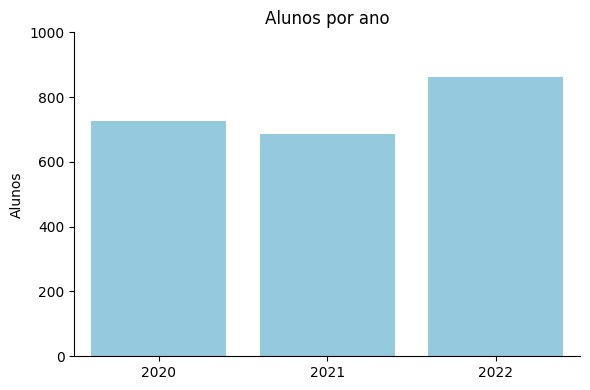

In [29]:
# Alunos em cada ano
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(data=df, x='ano', color='skyblue', ax=ax)
plt.title('Alunos por ano', fontsize=12)
y_max = df.groupby('ano').size().max() * 1.2
plt.yticks(np.arange(0, y_max, 200))
ax.set_xlabel('')
ax.set_ylabel('Alunos')
sns.despine()
plt.tight_layout()
plt.show()

In [30]:
# % de alunos por ano e fase
(df.groupby(['ano', 'fase']).size()\
    .unstack().apply(lambda x: x / x.sum(), axis=1) * 100).T

ano,2020,2021,2022
fase,,,
0,11.279230,17.784257,22.041763
1,23.658872,19.825073,22.273782
2,21.320495,23.615160,17.981439
3,16.781293,16.763848,17.169374
4,7.565337,8.600583,8.816705
5,7.427785,7.288630,6.960557
6,4.126547,3.352770,2.088167
7,4.539202,2.769679,2.668213
8,3.301238,NaN,NaN


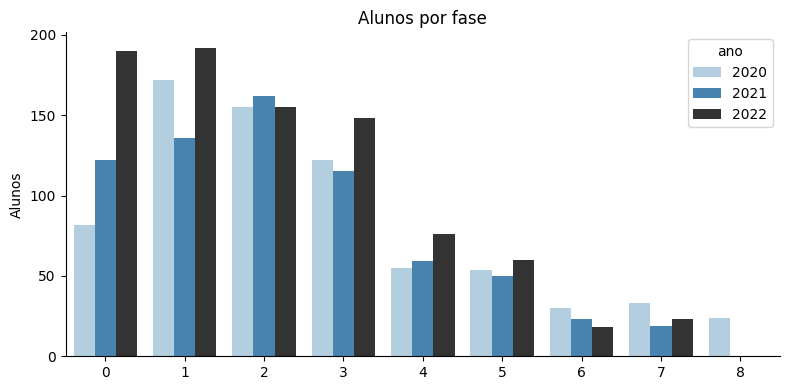

In [31]:
# plotar quantidade de alunos por ano
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(data=df, x='fase', hue='ano', palette='Blues_d', ax=ax)
plt.title('Alunos por fase', fontsize=12)
y_max = df.groupby(['ano', 'fase']).size().max() * 1.2
plt.yticks(np.arange(0, y_max, 50))
ax.set_xlabel('')
ax.set_ylabel('Alunos')
sns.despine()
plt.tight_layout()
plt.show()

In [32]:
# média de alunos por ano e fase
df.groupby(['ano', 'fase']).size().unstack().apply(lambda x: x.mean(), axis=0)

fase
0    131.333333
1    166.666667
2    157.333333
3    128.333333
4     63.333333
5     54.666667
6     23.666667
7     25.000000
8     24.000000
dtype: float64

In [33]:
# Variação da fase 0 ao longo dos anos
df.query('fase == 0').groupby('ano').size().pct_change() * 100

ano
2020          NaN
2021    48.780488
2022    55.737705
dtype: float64

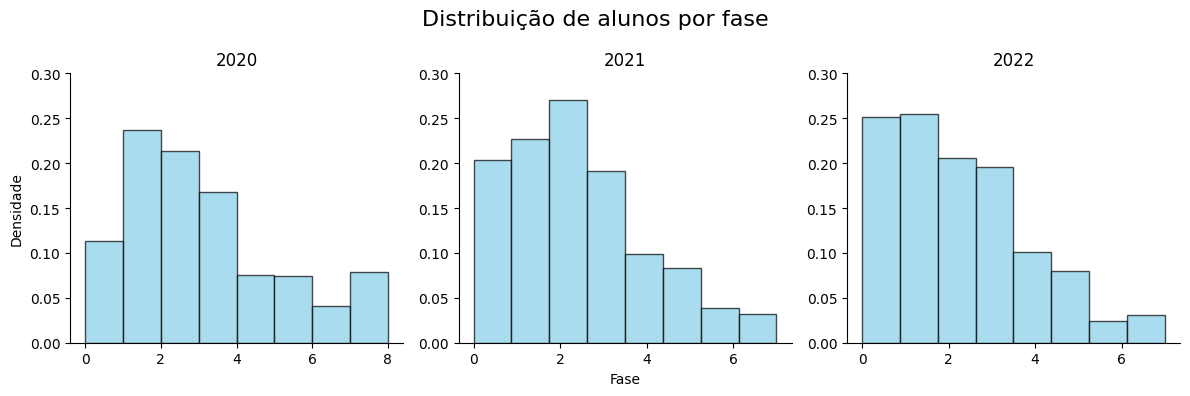

In [34]:
# Analisar fases predominantes em cada ano
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Distribuição de alunos por fase', fontsize=16)
for i, dataframe in enumerate(dfs):
    axs[i].hist(dataframe.fase, bins=8, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    axs[i].set_title(f'{2020 + i}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].set_ylim(0, .3)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
axs[1].set_xlabel('Fase')
axs[0].set_ylabel('Densidade')
plt.tight_layout()
plt.show()

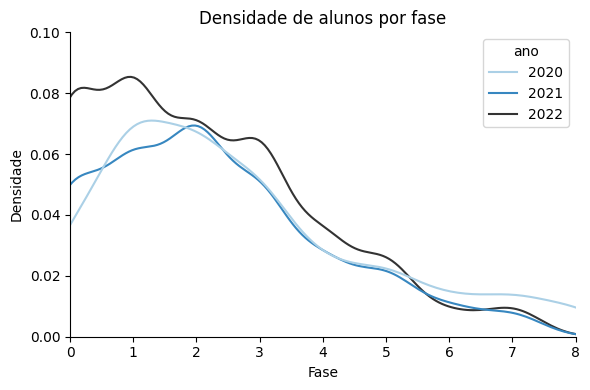

In [35]:
# KDE fases x ano
fig, ax = plt.subplots(figsize=(6, 4))
sns.kdeplot(data=df, x='fase', hue='ano', palette='Blues_d', ax=ax)
plt.title('Densidade de alunos por fase', fontsize=12)
ax.set_xlabel('Fase')
ax.set_ylabel('Densidade')
ax.set_xlim(0, 8)
plt.yticks(np.arange(0, .12, .02))
sns.despine()
plt.tight_layout()
plt.show()

In [36]:
num_indicators = ['inde', 'iaa', 'ian', 'ida', 'ieg', 'ipp', 'ips', 'ipv']
cat_indicators = ['ponto_virada', 'pedra']

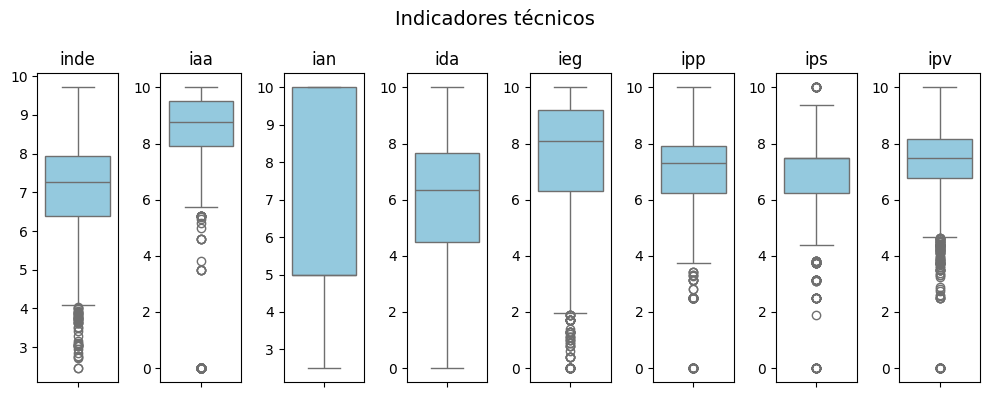

In [37]:
# Indicadores técnicos - todos os anos
fig, axs = plt.subplots(1, num_indicators.__len__(), figsize=(10, 4))

fig.suptitle('Indicadores técnicos', fontsize=14)
for i, indicator in enumerate(num_indicators):
    sns.boxplot(data=df, y=indicator, ax=axs[i], color='skyblue')
    axs[i].set_title(indicator)
    axs[i].set_ylabel('')
    axs[i].set_xlabel('')
plt.tight_layout()
plt.show()

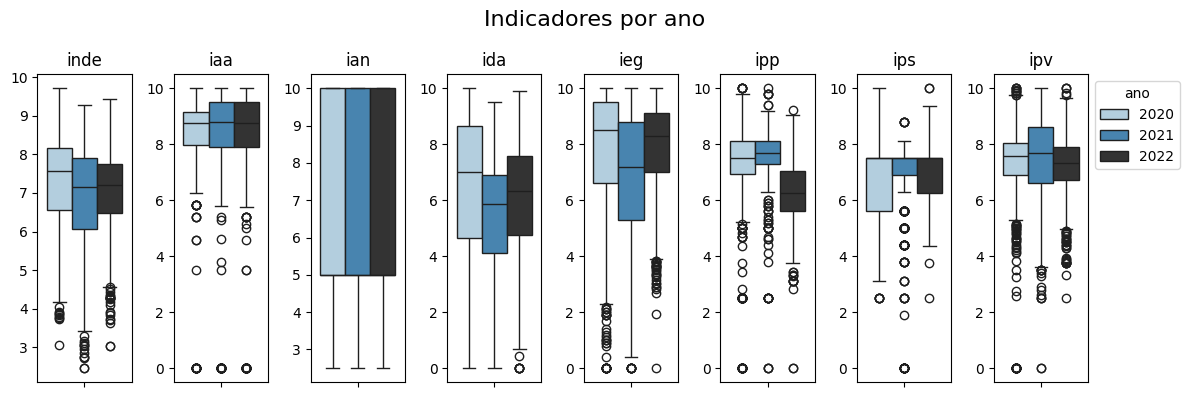

In [38]:
# Boxplot para cada indicador x ano
fig, axs = plt.subplots(1, num_indicators.__len__(), figsize=(12, 4))
fig.suptitle('Indicadores por ano', fontsize=16)
for i, indicator in enumerate(num_indicators):
    sns.boxplot(data=df, hue='ano', y=indicator, 
                legend=True, ax=axs[i], palette='Blues_d')
    axs[i].set_title(indicator)
    axs[i].set_ylabel('')
    axs[i].set_xlabel('')
    axs[i].legend_.remove()
plt.legend(title='ano', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

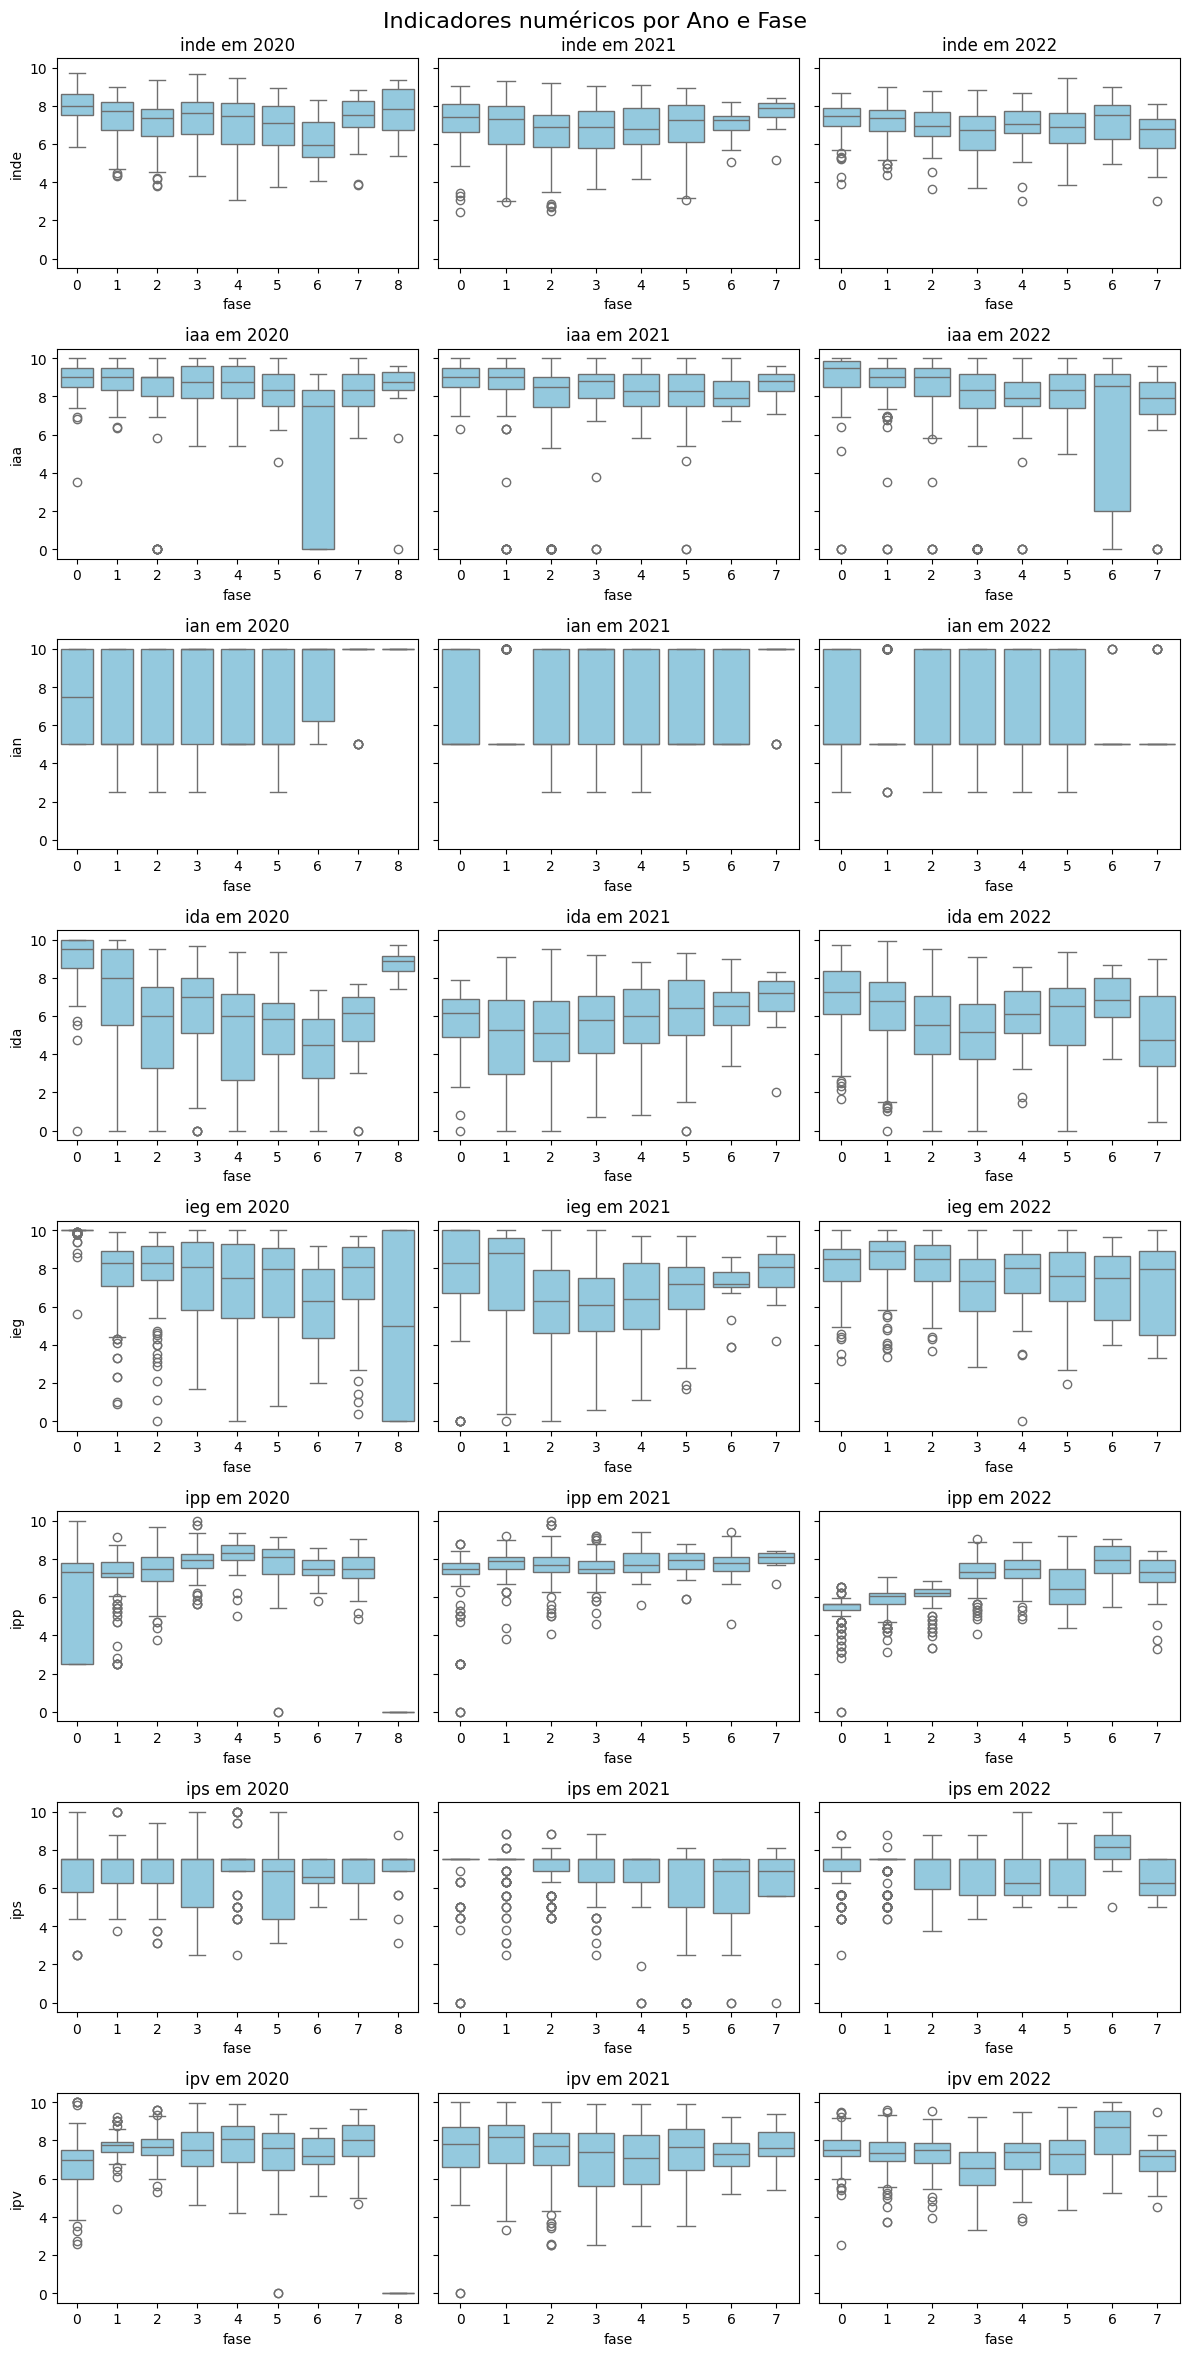

In [39]:
# Boxplots para os indicadores por Fase e Ano
fig, axs = plt.subplots(num_indicators.__len__(), dfs.__len__(), figsize=(12, 24), sharey=True)

fig.suptitle('Indicadores numéricos por Ano e Fase\n', fontsize=16)
for i, dataframe in enumerate(dfs):
    for j, indicator in enumerate(num_indicators):
        sns.boxplot(data=dataframe, y=indicator, x='fase', ax=axs[j, i], color='skyblue')
        axs[j, i].set_title(f'{indicator} em {2020 + i}')
        axs[j, i].set_ylabel(indicator)
plt.tight_layout()
plt.show()

In [40]:
# Estatísticas do INDE de todos os anos
print('INDE:')
print(f'Moda: {df.inde.mode().values[0]}')
print(f'Mediana: {df.inde.median():.2f}')
print(f'Média: {df.inde.mean():.2f}')
print(f'Desvio padrão: {df.inde.std():.2f}')
print(f'Assimetria: {df.inde.skew():.2f}')
print(f'Curtose: {df.inde.kurt():.2f}')

INDE:
Moda: 6.9
Mediana: 7.28
Média: 7.07
Desvio padrão: 1.21
Assimetria: -0.80
Curtose: 0.56


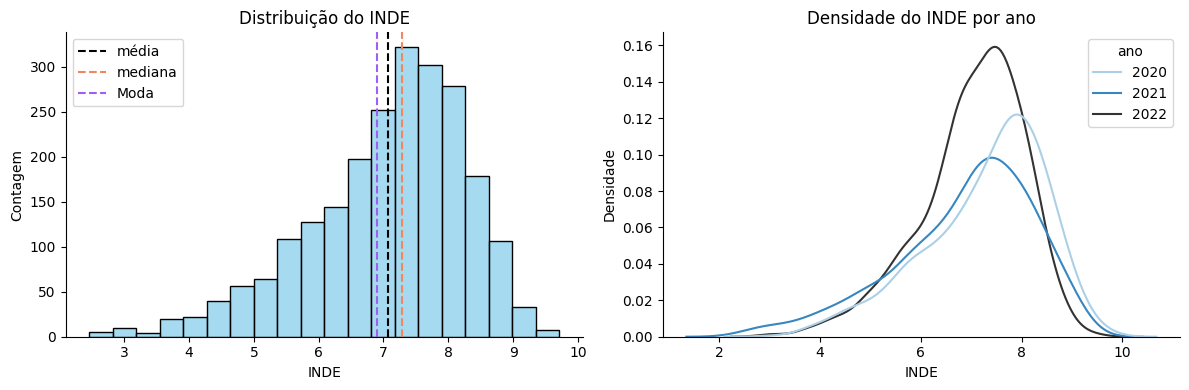

In [41]:
# Criar uma figura com dois subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Primeiro gráfico: Distribuição do INDE
sns.histplot(data=df, x='inde', bins=20, color='skyblue', ax=axes[0])
# Medidas centrais
axes[0].axvline(df.inde.mean(), color='k', linestyle='--', label='média')
axes[0].axvline(df.inde.median(), color='#F2865C', linestyle='--', label='mediana')
axes[0].axvline(df.inde.mode().values[0], color='#9E60F4', linestyle='--', label='Moda')
axes[0].set_title('Distribuição do INDE', fontsize=12)
axes[0].set_xlabel('INDE')
axes[0].set_ylabel('Contagem')
axes[0].legend()
sns.despine(ax=axes[0])

# Segundo gráfico: Densidade do INDE por ano
sns.kdeplot(data=df, x='inde', hue='ano', palette='Blues_d', ax=axes[1])
axes[1].set_title('Densidade do INDE por ano', fontsize=12)
axes[1].set_xlabel('INDE')
axes[1].set_ylabel('Densidade')
sns.despine(ax=axes[1])

# Ajustar layout
plt.tight_layout()
plt.show()

In [42]:
# Teste de normalidade INDE - Shapiro-Wilk
stat, p = shapiro(df.inde)
stat, p

print(f'Statística: {stat:.2f}, p-valor: {p:.2f}')
if p < 0.05:
    print('Hipótese nula rejeitada: os dados não seguem uma distribuição normal')
else:
    print('Hipótese nula aceita: os dados seguem uma distribuição normal')

Statística: 0.96, p-valor: 0.00
Hipótese nula rejeitada: os dados não seguem uma distribuição normal


In [43]:
# Verifica se cada ano segue uma distribuição normal
for year in [2020, 2021, 2022]:
    data = df.query(f'ano == {year}').inde
    stat, p = shapiro(data)
    print(f'ANO: {year} - Estatística={stat:.3f}, p-valor={p:.3f}')
    print('Distribuição normal' if p > 0.05 else 'Distribuição não normal')

ANO: 2020 - Estatística=0.955, p-valor=0.000
Distribuição não normal
ANO: 2021 - Estatística=0.954, p-valor=0.000
Distribuição não normal
ANO: 2022 - Estatística=0.964, p-valor=0.000
Distribuição não normal


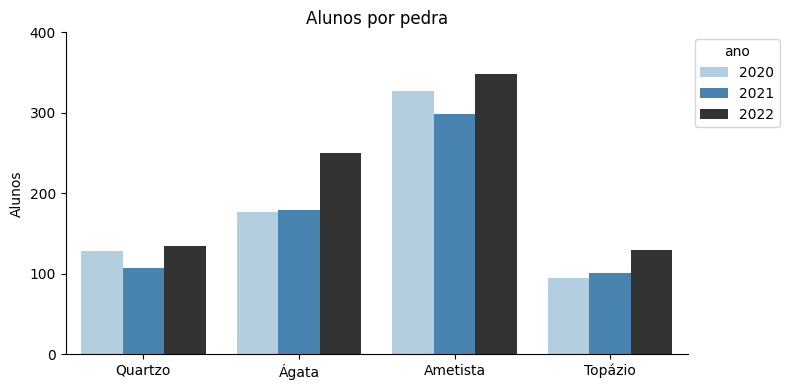

In [44]:
# Ordem das pedras: Quartzo, Ágata, Ametista, Topázio
# Pedra por fase
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(data=df, x='pedra', hue='ano', palette='Blues_d', 
              order=['Quartzo', 'Ágata', 'Ametista', 'Topázio'], ax=ax)
plt.title('Alunos por pedra', fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Alunos')
plt.yticks(np.arange(0, 500, 100))
sns.despine()
plt.legend(title='ano', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

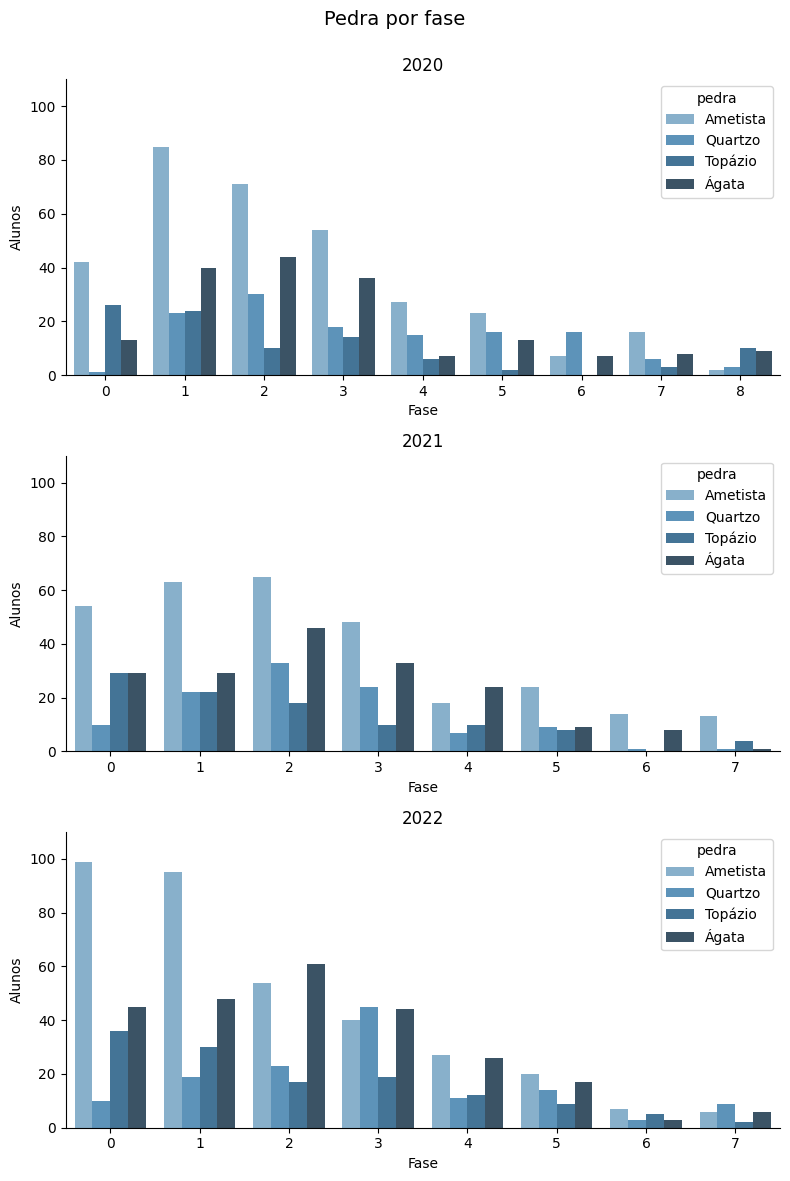

In [45]:
# Pedra por fase - separado por ano
years = df.ano.unique()
fig, axs = plt.subplots(years.__len__(), 1, figsize=(8, 12))
fig.suptitle('Pedra por fase\n', fontsize=14)
for i, year in enumerate(years):
    sns.countplot(data=df.query(f'ano == {year}'), x='fase', hue='pedra', 
                  palette='Blues_d', ax=axs[i])
    axs[i].set_title(f'{year}')
    axs[i].set_xlabel('Fase')
    axs[i].set_ylabel('Alunos')
    axs[i].set_ylim(0, 110)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
plt.tight_layout()
plt.show()

In [46]:
# Porcentagens de alunos que atingiram o ponto de virada
df.ponto_virada.value_counts(normalize=True) * 100

ponto_virada
False    84.923077
True     15.076923
Name: proportion, dtype: float64

In [47]:
# Porcentagem de alunos que atingiram o ponto de virada por ano
df.groupby('ano').ponto_virada.mean() * 100

ano
2020    16.506190
2021    16.034985
2022    13.109049
Name: ponto_virada, dtype: float64

In [48]:
# Atingiram do ponto de virada por fase
df.query('ponto_virada == True').describe()[['inde', 'iaa', 'ian', 'ida', 'ieg', 'ipp', 'ipv']]

,inde,iaa,ian,ida,ieg,ipp,ipv
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,8.222341,8.861863,7.616618,7.637933,8.708367,7.271453,8.417406
std,0.775395,1.285053,2.533596,1.375451,2.041612,2.447786,2.551357
min,2.460000,0.000000,2.500000,1.500000,0.000000,0.000000,0.000000
25%,7.881459,8.333340,5.000000,6.838889,8.600000,6.614583,8.666673
50%,8.332224,9.166680,10.000000,7.666667,9.201754,8.100000,9.100000
75%,8.678334,9.500020,10.000000,8.666667,9.900000,8.750000,9.500000
max,9.712502,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [49]:
# Não atingiram o ponto de virada
df.query('ponto_virada == False').describe()[['inde', 'iaa', 'ian', 'ida', 'ieg', 'ipp', 'ipv']]

,inde,iaa,ian,ida,ieg,ipp,ipv
count,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000
mean,6.861752,8.157669,6.759834,5.658181,7.282980,6.869398,7.094863
std,1.151936,2.097708,2.480276,2.458056,2.164633,1.310091,1.118802
min,2.470000,0.000000,2.500000,0.000000,0.000000,0.000000,2.500000
25%,6.219584,7.916670,5.000000,4.200000,6.033452,6.041667,6.611102
50%,7.069549,8.750010,5.000000,6.000000,7.883329,7.291667,7.333333
75%,7.709273,9.200000,10.000000,7.404167,8.900000,7.800000,7.833338
max,9.316669,10.000000,10.000000,10.000000,10.000000,9.400000,9.000000


In [50]:
# INDE x Pontos de virada
print('INDE:')
print(f'Média de quem atingiu: {df.query("ponto_virada == True").inde.mean():.2f}')
print(f'Média de quem não atingiu: {df.query("ponto_virada == False").inde.mean():.2f}')
print(f'Diferença percentual: {((df.query("ponto_virada == True").inde.mean() / df.query("ponto_virada == False").inde.mean()) - 1) * 100:.2f}%')

# IDA x Ponto de virada
print('IDA:')
print(f'Média de quem atingiu: {df.query("ponto_virada == True").ida.mean():.2f}')
print(f'Média de quem não atingiu: {df.query("ponto_virada == False").ida.mean():.2f}')
print(f'Diferença percentual: {((df.query("ponto_virada == True").ida.mean() / df.query("ponto_virada == False").ida.mean()) - 1) * 100:.2f}%')

# IEG x Ponto de virada
print('IEG:')
print(f'Média de quem atingiu: {df.query("ponto_virada == True").ieg.mean():.2f}')
print(f'Média de quem não atingiu: {df.query("ponto_virada == False").ieg.mean():.2f}')
print(f'Diferença percentual: {((df.query("ponto_virada == True").ieg.mean() / df.query("ponto_virada == False").ieg.mean()) - 1) * 100:.2f}%')

# IAA x Ponto de virada
print('IAA:')
print(f'Média de quem atingiu: {df.query("ponto_virada == True").iaa.mean():.2f}')
print(f'Média de quem não atingiu: {df.query("ponto_virada == False").iaa.mean():.2f}')
print(f'Diferença percentual: {((df.query("ponto_virada == True").iaa.mean() / df.query("ponto_virada == False").iaa.mean()) - 1) * 100:.2f}%')

# IPP x Ponto de virada
print('IPP:')
print(f'Média de quem atingiu: {df.query("ponto_virada == True").ipp.mean():.2f}')
print(f'Média de quem não atingiu: {df.query("ponto_virada == False").ipp.mean():.2f}')
print(f'Diferença percentual: {((df.query("ponto_virada == True").ipp.mean() / df.query("ponto_virada == False").ipp.mean()) - 1) * 100:.2f}%')

INDE:
Média de quem atingiu: 8.22
Média de quem não atingiu: 6.86
Diferença percentual: 19.83%
IDA:
Média de quem atingiu: 7.64
Média de quem não atingiu: 5.66
Diferença percentual: 34.99%
IEG:
Média de quem atingiu: 8.71
Média de quem não atingiu: 7.28
Diferença percentual: 19.57%
IAA:
Média de quem atingiu: 8.86
Média de quem não atingiu: 8.16
Diferença percentual: 8.63%
IPP:
Média de quem atingiu: 7.27
Média de quem não atingiu: 6.87
Diferença percentual: 5.85%


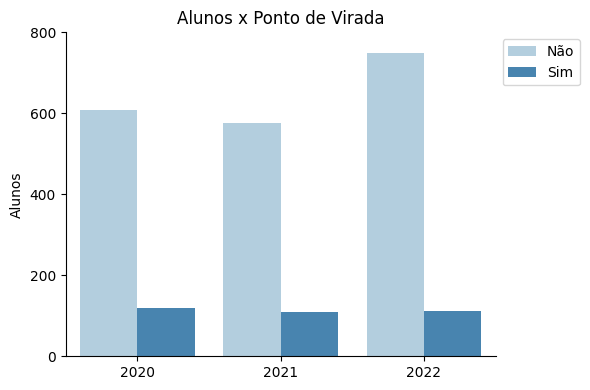

In [51]:
# Ponto de virada por fase
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(data=df, x='ano', hue='ponto_virada', palette='Blues', ax=ax)
plt.title('Alunos x Ponto de Virada', fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Alunos')
sns.despine()
plt.yticks(np.arange(0, 900, 200))
plt.legend(['Não', 'Sim'], loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

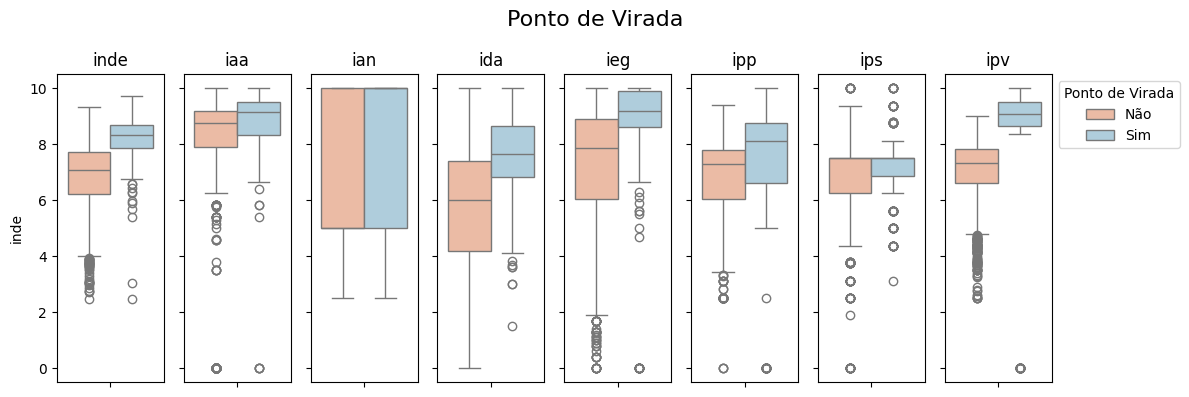

In [52]:
# Indicadores técnicos x ponto de virada - todos os anos
fig, axs = plt.subplots(1, num_indicators.__len__(), figsize=(12, 4), sharey=True)

fig.suptitle('Ponto de Virada', fontsize=16)
for i, indicator in enumerate(num_indicators):
    sns.boxplot(data=df, hue='ponto_virada', y=indicator, ax=axs[i], palette='RdBu')
    axs[i].set_title(f'{indicator}')
    axs[i].set_ylabel(indicator)
    axs[i].set_xlabel('')
    axs[i].legend_.remove()
plt.legend(title='Ponto de Virada', loc='upper left', 
           bbox_to_anchor=(1, 1), labels=['Não', 'Sim'])
plt.tight_layout()
plt.show()

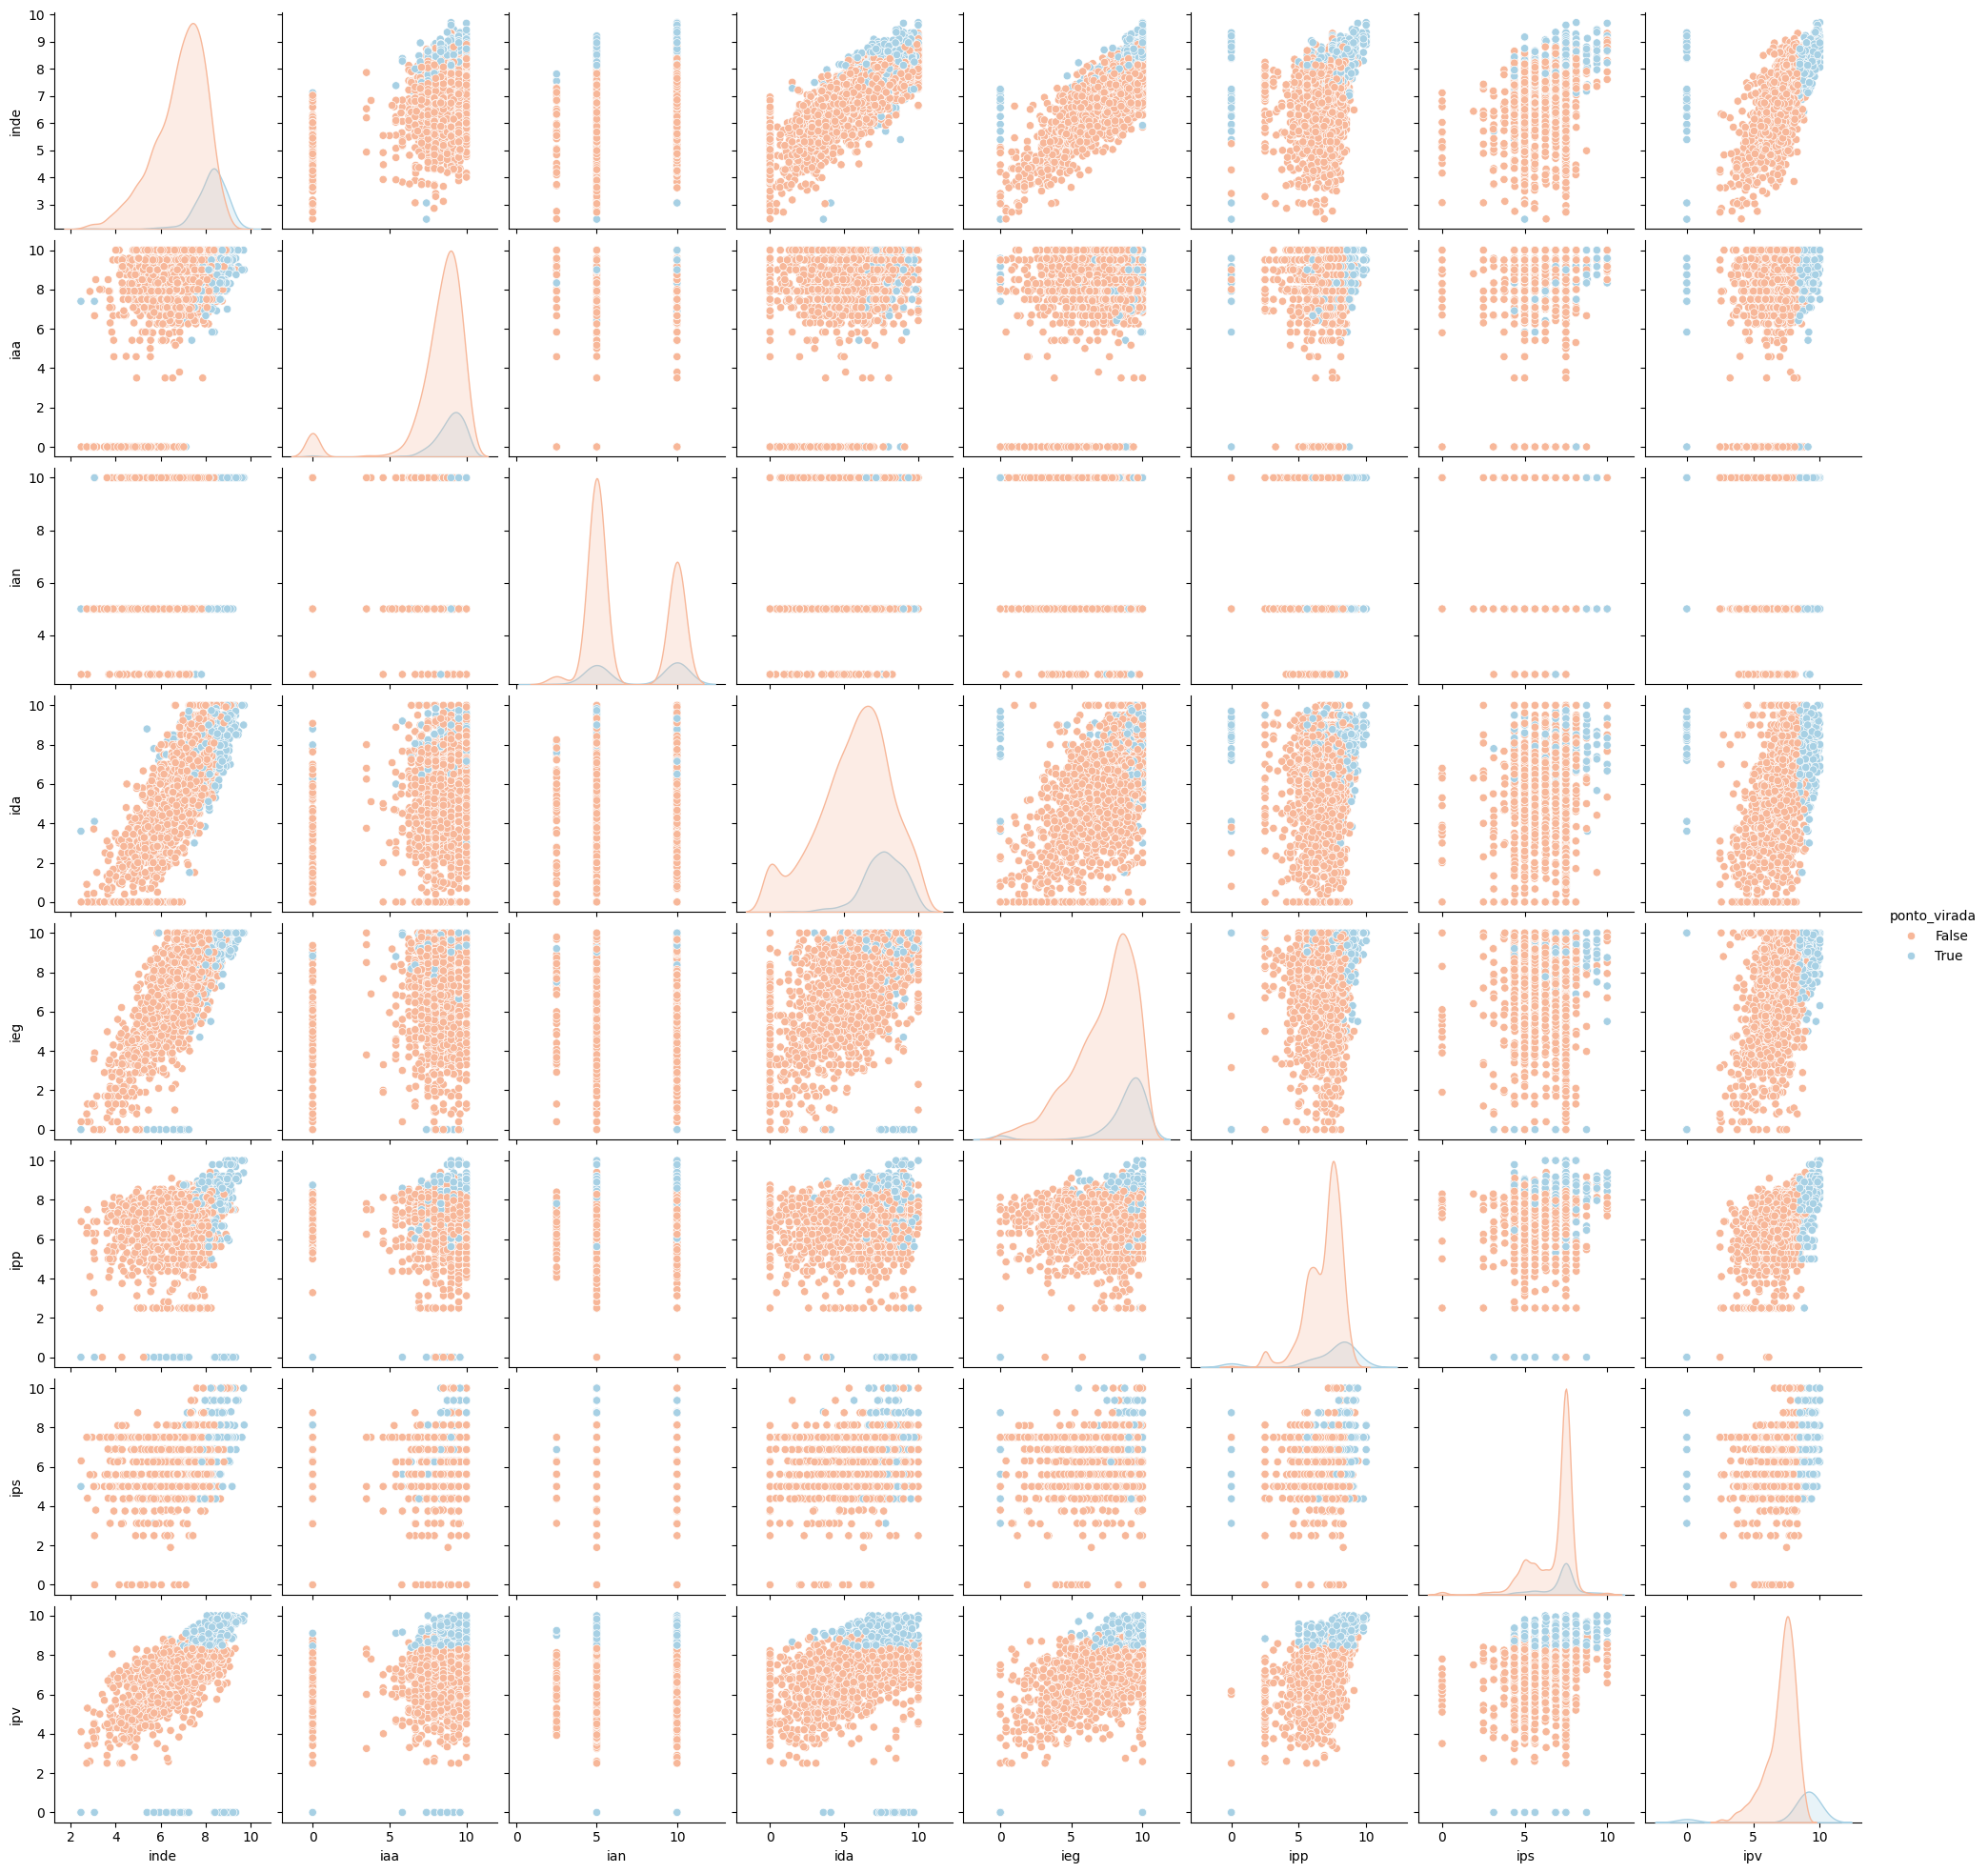

In [53]:
sns.pairplot(df[num_indicators + ['ponto_virada']], hue='ponto_virada', palette='RdBu')
plt.show()

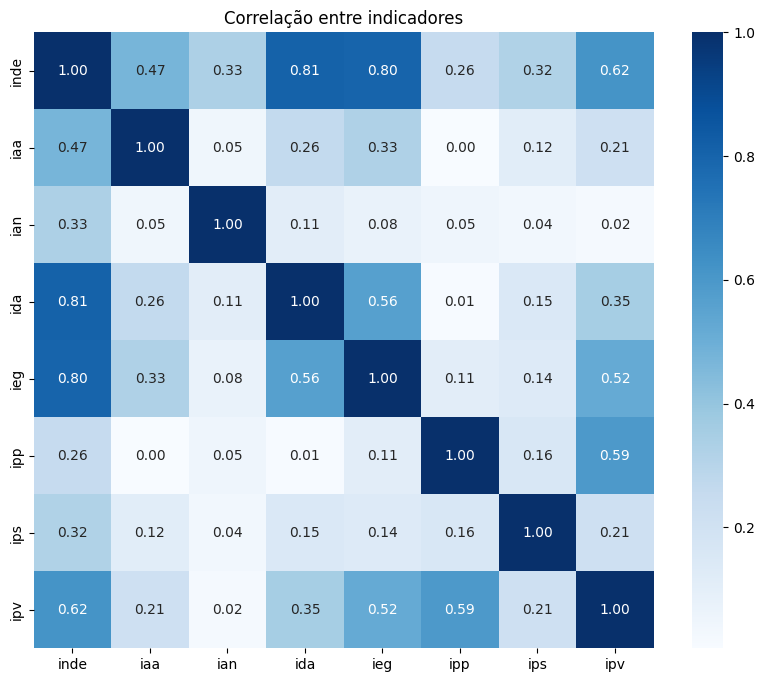

In [54]:
# correlação entre indicadores técnicos
corr = df[num_indicators].corr()

# plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlação entre indicadores')
plt.show()

O INDE possui correlações fortes porque é composto e ponderado por outros indicadores. Excluindo o INDE, a maior correlação é dada por IPP e IPV (0.59), no entanto, uma correlação entre 0.5 e 0.7 é considerada moderada.

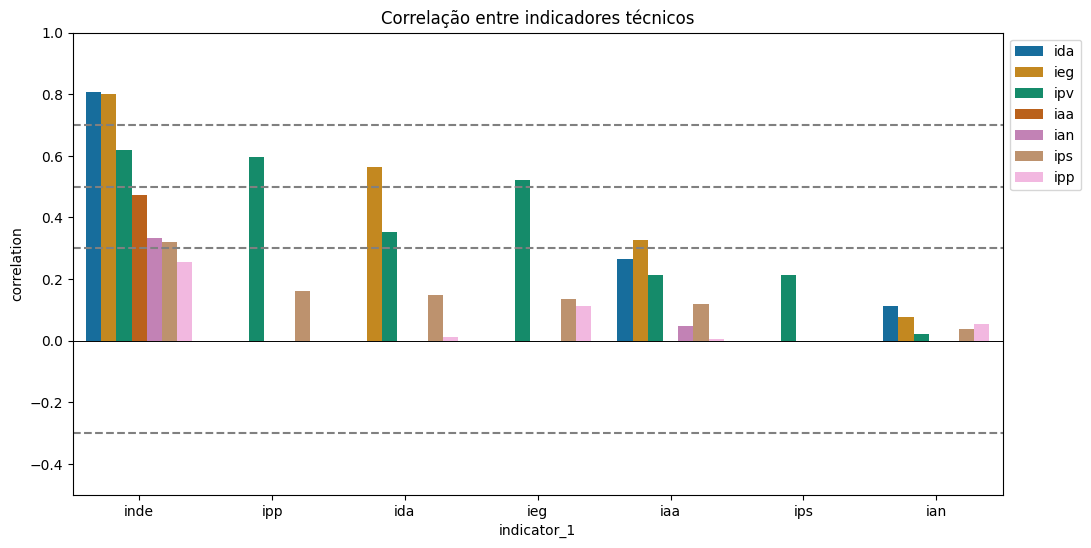

In [55]:
# Combinações de indicadores técnicos
corr_stack = corr.stack().reset_index()
corr_stack.columns = ['indicator_1', 'indicator_2', 'correlation']
corr_stack = corr_stack.drop_duplicates(subset='correlation')
corr_stack = corr_stack[corr_stack.correlation != 1]
corr_stack = corr_stack.sort_values(by='correlation', ascending=False)

# pLotar
plt.figure(figsize=(12, 6))
sns.barplot(data=corr_stack, y='correlation', x='indicator_1', hue='indicator_2', palette='colorblind')
plt.axhline(y=0.7, color='gray', linestyle='--')
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.axhline(y=0.3, color='gray', linestyle='--')
plt.axhline(y=-0.3, color='gray', linestyle='--')
plt.title('Correlação entre indicadores técnicos')
plt.axhline(y=0, color='k', linewidth=0.7)
plt.ylim(-0.5, 1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [56]:
# correlações acima de 70% e abaixo de -70%
corr_stack.query('correlation > 0.7 or correlation < -0.7')

,indicator_1,indicator_2,correlation
3,inde,ida,0.807552
4,inde,ieg,0.800229


In [57]:
# Casos onde indicador ponto_virada=True e ipv=0
df.query('ponto_virada == True and ipv == 0').shape

(28, 46)

Alunos que saíram:

In [58]:
students_20 = df_20.nome.unique().tolist()
students_21 = df_21.nome.unique().tolist()
students_22 = df_22.nome.unique().tolist()

# alunos que estão em todos os anos
students_in_all = set(students_20) & set(students_21) & set(students_22)

# alunos que estão em 2020 e não estão em 2021
students_in_20_not_in_21 = set(students_20) - set(students_21)

# alunos que estão em 2021 e não estão em 2020
students_in_21_not_in_20 = set(students_21) - set(students_20)

# alunos que estão em 2021 e não estão em 2022
students_in_21_not_in_22 = set(students_21) - set(students_22)

# alunos que estão em 2022 e não estão em 2021
students_in_22_not_in_21 = set(students_22) - set(students_21)

# print lens
# total de alunos de 2020
print(f'Alunos em todos os anos: {len(students_in_all)}')
print('*' * 50)
print(f'Média de alunos por ano: {sum([len(students_20), len(students_21), len(students_22)]) / 3:.2f}')
print(f'Média de saídas por ano: {sum([len(students_in_20_not_in_21), len(students_in_21_not_in_22)]) / 2:.2f}')
print(f'Média de novos alunos por ano: {sum([len(students_in_21_not_in_20), len(students_in_22_not_in_21)]) / 2:.2f}')
print(f'Média de retenção por ano: {len(students_in_all) / 3:.2f}')
print('*' * 50)
print(f'Alunos em 2020: {len(students_20)}')
print(f'Alunos em 2021: {len(students_21)}')
print(f'Alunos em 2022: {len(students_22)}')
print('*' * 50)
print(f'Saíram após 2020: {len(students_in_20_not_in_21)}')
print(f'Entraram em 2021: {len(students_in_21_not_in_20)}')
print(f'Diferença 2021-2020: {len(students_21) - len(students_20)}')
print('*' * 50)
print(f'Saíram após 2021: {len(students_in_21_not_in_22)}')
print(f'Entraram em 2022: {len(students_in_22_not_in_21)}')
print(f'Diferença 2022-2021: {len(students_22) - len(students_21)}')

Alunos em todos os anos: 314
**************************************************
Média de alunos por ano: 758.33
Média de saídas por ano: 249.50
Média de novos alunos por ano: 317.00
Média de retenção por ano: 104.67
**************************************************
Alunos em 2020: 727
Alunos em 2021: 686
Alunos em 2022: 862
**************************************************
Saíram após 2020: 270
Entraram em 2021: 229
Diferença 2021-2020: -41
**************************************************
Saíram após 2021: 229
Entraram em 2022: 405
Diferença 2022-2021: 176


In [59]:
# alunos que saíram e estavam na última fase x alunos que saíram e não estavam na última fase
df_left_21 = df_20[df_20.nome.isin(students_in_20_not_in_21)].copy()
df_left_22 = df_21[df_21.nome.isin(students_in_21_not_in_22)].copy()
# concat
df_left = pd.concat([df_left_21, df_left_22])
# check dups
print(f'Duplicados: {df_left.nome.duplicated().sum()}')
print('*' * 50)
print(f'{df_left.query("fase != 8").shape[0] / df_left.shape[0] * 100:.2f}% dos alunos que saíram não estavam na última fase.')
# 24 alunos saíram e estavam na última fase
df_left.fase.value_counts().sort_index()

Duplicados: 0
**************************************************
95.19% dos alunos que saíram não estavam na última fase.


fase
0    58
1    91
2    94
3    72
4    39
5    47
6    24
7    50
8    24
Name: count, dtype: int64

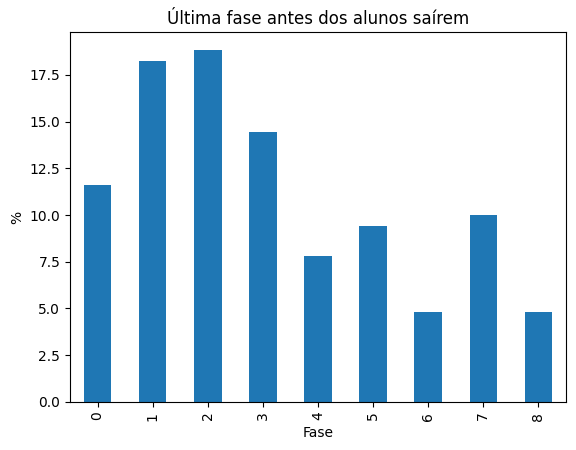

In [60]:
(df_left.fase.value_counts(normalize=True).sort_index()*100).plot(kind='bar', xlabel='Fase', ylabel='%',
                                                                  title='Última fase antes dos alunos saírem');

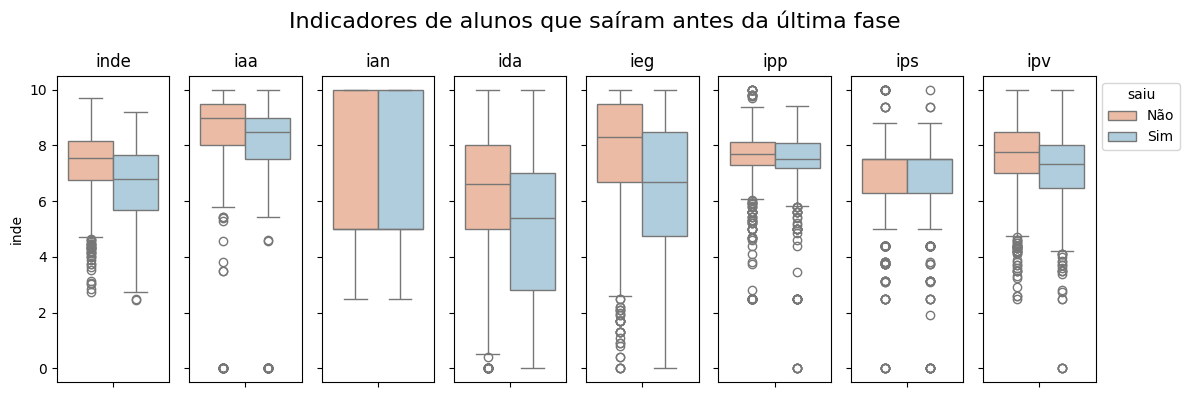

In [61]:
# Boxplot Alunos que saíram antes do fim do curso (fases 0-7) - anos 2020 e 2021
fig, axs = plt.subplots(1, num_indicators.__len__(), figsize=(12, 4), sharey=True)

fig.suptitle('Indicadores de alunos que saíram antes da última fase', fontsize=16)

for i, indicator in enumerate(num_indicators):
    sns.boxplot(data=df.query('grupo_fase == "Fases 1-7" and ano != 2022'), y=indicator, hue='saiu', ax=axs[i], palette='RdBu')
    axs[i].set_title(f'{indicator}')
    axs[i].set_ylabel(indicator)
    axs[i].legend_.remove()
plt.legend(['Não', 'Sim'], title='saiu', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [62]:
sairam_antes = df.query('grupo_fase == "Fases 1-7" and ano != 2022 and saiu == True').shape[0]
n = df.query('grupo_fase == "Fases 1-7" and ano != 2022').shape[0]

print(f'Alunos que saíram antes do fim do curso: {sairam_antes}')
print(f'Alunos que saíram antes do fim do curso: {sairam_antes / n * 100:.2f}%')

Alunos que saíram antes do fim do curso: 475
Alunos que saíram antes do fim do curso: 34.20%


O Indicador de Autoavaliação **IAA** é uma medida de dimensão Psicossocial que incorpora a subjetividade do aluno em 6 aspectos de sua vida: 
- Como se sente na hora de estudar
- Como se sente consigo mesmo
- Como se sente quando pensa na Passos Mágicos
- Como se sente quando está com os quando está com os amigos
- Como se sente quando está com a família
- Como se sente sobre seus Professores na PM

Os dados são obtidos através de um questionário padronizado e, em seguida, ponderados para se obter o IAA.

<img src="img\formacao_indice_autoavaliacao_iaa_passos_magicos.png" width="800">
<br>
<i>Fonte: Passos Mágicos - Relatório PEDE 2020 (Dario Rodrigues da Silva, 2021)</i>

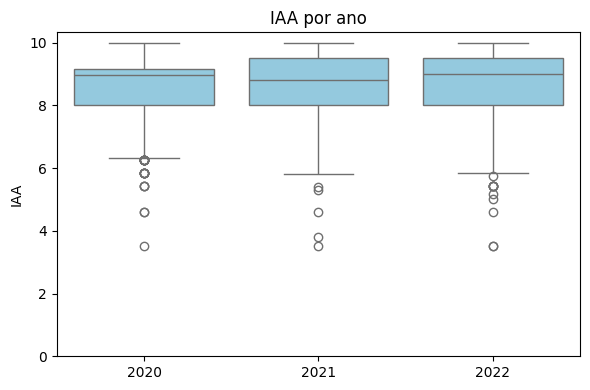

In [63]:
# IAA em cada ano
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(data=df.query('iaa > 0'), x='ano', y='iaa', color='skyblue', ax=ax)
plt.title('IAA por ano', fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('IAA')
plt.yticks(np.arange(0, 11, 2))
plt.tight_layout()
plt.show()

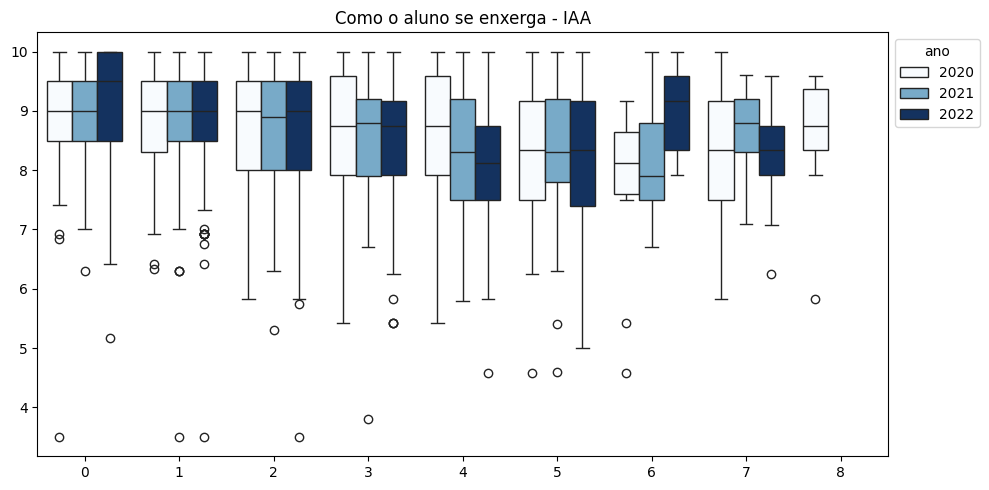

In [64]:
# Retirar notas zeradas, já que são de alunos que não realizaram a autoavaliação
fix, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(df.query('iaa > 0').sort_values('fase'), y='iaa', x='fase', hue='ano', palette='Blues', ax=ax)
plt.title('Como o aluno se enxerga - IAA')
ax.set_xlabel('')
ax.set_ylabel('')
plt.legend(title='ano', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

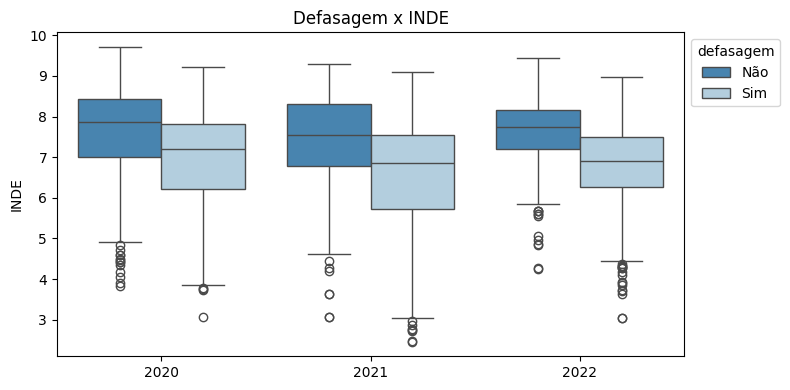

In [65]:
# se IAN = 10, 'defasagem' = 'Não', se IAN < 10, 'defasagem' = 'Sim'
df['defasagem'] = df.ian.apply(lambda x: 'Sim' if x < 10 else 'Não')

# Agrupado por IAN, plotar INDE
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(data=df, x='ano', y='inde', hue='defasagem', palette='Blues_r', ax=ax)
plt.title('Defasagem x INDE', fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('INDE')
# legenda
plt.legend(title='defasagem', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

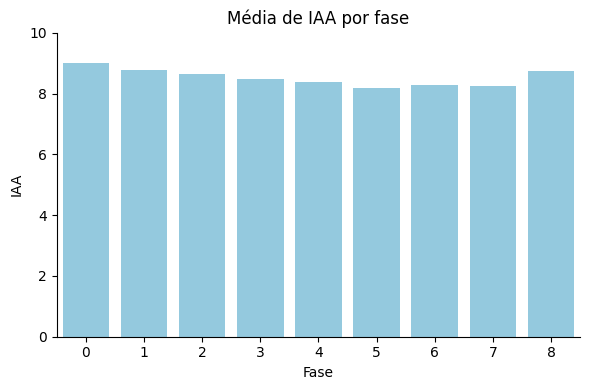

In [66]:
# média de IAA por fase
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(data=df.query('iaa > 0').sort_values('fase'), 
            x='fase', y='iaa', color='skyblue', errorbar=None, ax=ax)
plt.title('Média de IAA por fase', fontsize=12)
ax.set_xlabel('Fase')
ax.set_ylabel('IAA')
plt.yticks(np.arange(0, 11, 2))
sns.despine()
plt.tight_layout()
plt.show()

In [67]:
# excluindo zeros, menor e maior média de IAA ocorrem nas fases
df.query('iaa > 0').groupby('fase').iaa.mean().idxmin(), df.query('iaa > 0').groupby('fase').iaa.mean().idxmax()

(5, 0)

In [68]:
# com os valores
df.query('iaa > 0').groupby('fase').iaa.mean().min(), df.query('iaa > 0').groupby('fase').iaa.mean().max()

(8.200621419753086, 9.015739335038363)

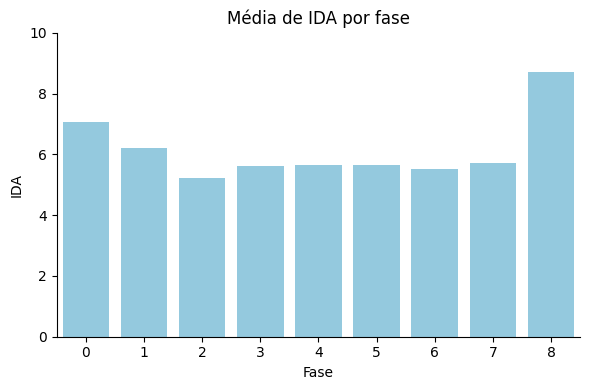

In [69]:
# média do IDA por fase
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(data=df.sort_values('fase'), 
            x='fase', y='ida', color='skyblue', errorbar=None, ax=ax)
plt.title('Média de IDA por fase', fontsize=12)
ax.set_xlabel('Fase')
ax.set_ylabel('IDA')
plt.yticks(np.arange(0, 11, 2))
sns.despine()
plt.tight_layout()
plt.show()

In [70]:
# menor e maior média de IDA ocorrem nas fases
df.groupby('fase').ida.mean().idxmin(), df.groupby('fase').ida.mean().idxmax()

(2, 8)

In [71]:
# com os valores
df.groupby('fase').ida.mean().min(), df.groupby('fase').ida.mean().max()

(5.209957627118644, 8.700000000000001)

As avaliações de matemática, português e inglês estão presentes para o ano de 2022.

In [72]:
df.loc[df.nota_mat.isna()].groupby('ano').size()

ano
2020    727
2021    686
2022      2
dtype: int64

Houve mesma quantidade de avaliações de matemática e português e quantidade menor de avaliações de inglês.

In [73]:
# Quantidade de avaliações por matéria
df[['nota_mat', 'nota_port', 'nota_ing']].notna().sum()

nota_mat     860
nota_port    860
nota_ing     285
dtype: int64

In [74]:
# % de avaliações por matéria
df[['nota_mat', 'nota_port', 'nota_ing']].notna().sum() / df.query('ano == 2022').shape[0] * 100

nota_mat     99.767981
nota_port    99.767981
nota_ing     33.062645
dtype: float64

In [75]:
# Quantidade de alunos avaliados contra o total de alunos de 2022
df[['nota_mat', 'nota_port']].notna().sum() / df_22.shape[0] * 100

nota_mat     99.767981
nota_port    99.767981
dtype: float64

In [76]:
# Apenas 2 alunos não foram avaliados em matemática e português
df.query('ano == 2022 and nota_mat.isna() and nota_port.isna()')

,nome,instituicao_ensino_aluno,idade_aluno,anos_pm,ponto_virada,inde,inde_conceito,pedra,destaque_ieg,destaque_ida,destaque_ipv,iaa,ieg,ips,ida,ipp,ipv,ian,ano,fase,turma,sinalizador_ingressante,rec_equipe_1,rec_equipe_2,rec_equipe_3,rec_equipe_4,nivel_ideal,defasagem,ano_ingresso,bolsista,cg,cf,ct,nota_port,nota_mat,nota_ing,qtd_aval,rec_ava_1,rec_ava_2,rec_ava_3,rec_ava_4,indicado_bolsa,grupo_fase,saiu,atencao,destaque
1851,ALUNO-697,NaN,NaN,NaN,False,4.097072,NaN,Quartzo,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,0.00000,5.605159,6.25,0.0,7.34375,6.833328,2.5,2022,3,L,NaN,NaN,NaN,NaN,NaN,Fase 6 (2º EM),Sim,2022.0,False,854.0,147.0,10.0,NaN,NaN,NaN,4.0,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,False,Fases 1-7,False,False,False
2269,ALUNO-1340,NaN,NaN,NaN,False,5.030804,NaN,Quartzo,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,9.58335,5.773810,7.50,0.0,7.34375,5.916663,2.5,2022,3,L,NaN,NaN,NaN,NaN,NaN,Fase 8 (Universitários),Sim,2022.0,False,819.0,127.0,6.0,NaN,NaN,NaN,4.0,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,Promovido de Fase,False,Fases 1-7,False,False,False


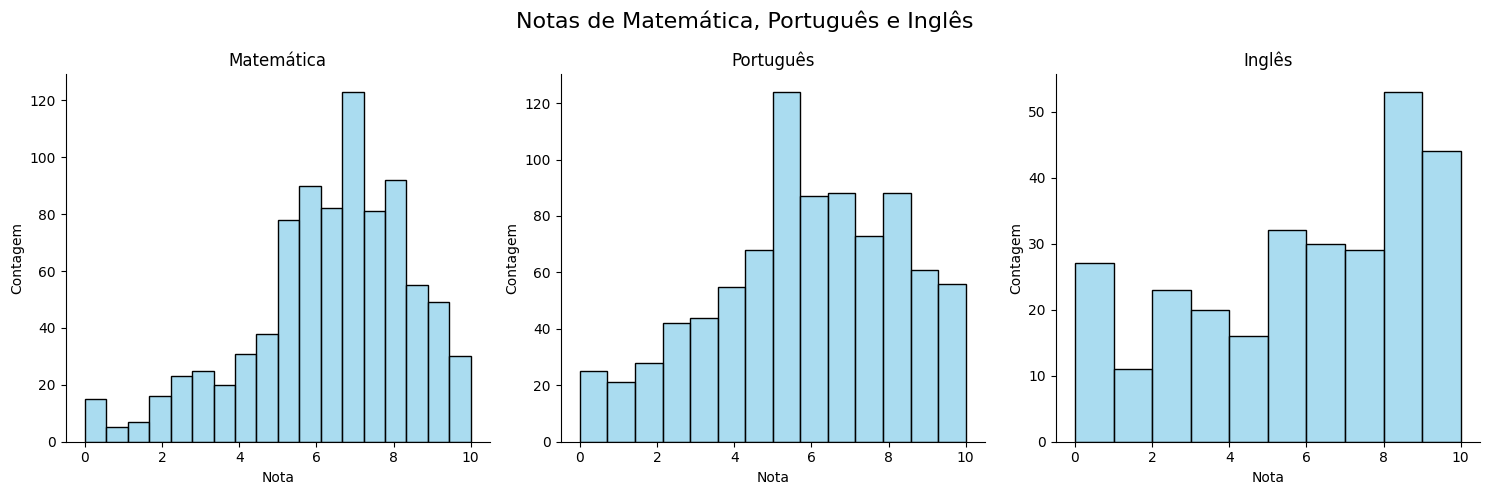

In [77]:
# plotar nota_mat x nota_port x nota_ing - histograma
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Notas de Matemática, Português e Inglês', fontsize=16)

# matemática
sns.histplot(data=df, x='nota_mat', color='skyblue', kde=False, alpha=0.7, ax=axs[0])
axs[0].set_title('Matemática')
axs[0].set_xlabel('Nota')
axs[0].set_ylabel('Contagem')

# português
sns.histplot(data=df, x='nota_port', color='skyblue', kde=False, alpha=0.7, ax=axs[1])
axs[1].set_title('Português')
axs[1].set_xlabel('Nota')
axs[1].set_ylabel('Contagem')

# inglês
sns.histplot(data=df, x='nota_ing', color='skyblue', kde=False, alpha=0.7, ax=axs[2])
axs[2].set_title('Inglês')
axs[2].set_xlabel('Nota')
axs[2].set_ylabel('Contagem')

for ax in axs:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

O gráfico de densidade mostra que a maioria dos alunos vai melhor em inglês e tem maior dificuldade em português. Matemática é a disciplina com maior quantidade de notas entre 6 e 8.

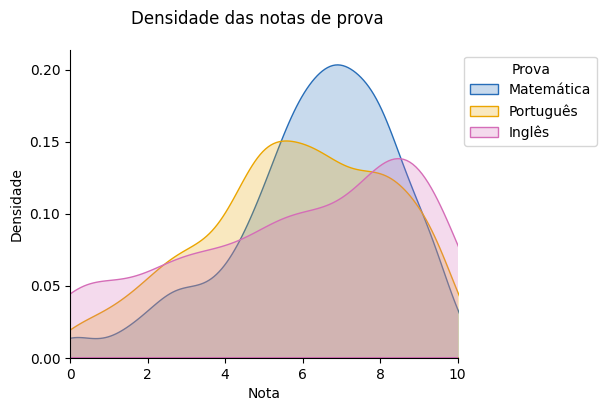

In [78]:
# Gráfico de densidade das notas de Matemática, Português e Inglês
fig, ax = plt.subplots(figsize=(5, 4))
fig.suptitle('Densidade das notas de prova', fontsize=12)

sns.kdeplot(data=df, x='nota_mat', color='#276DB8', label='Matemática', fill=True)
sns.kdeplot(data=df, x='nota_port', color='#EBA500', label='Português', fill=True)
sns.kdeplot(data=df, x='nota_ing', color='#D56DB8', label='Inglês', fill=True)
plt.xlabel('Nota')
plt.ylabel('Densidade')
plt.legend(title='Prova', loc='upper left', bbox_to_anchor=(1, 1))
plt.yticks(np.arange(0, .25, .05))
# x limit 0-10
plt.xlim(0, 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

A função `generate_stats` permite um dataframe com as estatísticas gerais para os indicadores da Passos Mágicos por ano e fase, enquanto a função `identify_outliers` gera um dataframe com regitros de alunos que foram outliers em algum indicador, baseado no intervalo interquartil.

**Cálculo do intervalo interquartil:**

Dado que

- $Q3 = 75\% \text{ dos dados}$

- $Q1 = 25\% \text{ dos dados}$

Calcula-se o Intervalo Interquartil (IQR) como

$IQR = Q3 - Q1$

Os limites inferior e superior são descritos como

$L_{\text{inferior}} = Q1 - 1.5 \times IQR$

$L_{\text{superior}} = Q3 + 1.5 \times IQR$

Sendo assim, outliers são considerados alunos que estão fora desse intervalo
$$
\text{Outliers} = \text{Alunos} \notin [Q1 - 1.5 \times IQR, Q3 + 1.5 \times IQR]
$$

O intervalo interquartil é calculado para para indicador, considerando os agrupamentos de ano e fase, e alunos que estão fora do intervalo são considerados outliers.

In [79]:
ano_stats = generate_stats(df)
grupo_fase_stats = generate_stats(df, aggregate='grupo_fase')
fase_stats = generate_stats(df, aggregate='fase')
pedra_stats = generate_stats(df, aggregate='pedra')

ano_stats

,ano,indicador,contagem,media,desvio_padrao,media_menos_1dp,media_mais_1dp,minimo,maximo,percentil_25,mediana,percentil_75,iqr,limite_inferior,limite_superior,moda,pontos_perdidos,variacao_percentual
0,2020,inde,727,7.290068,1.200209,6.089859,8.490278,3.065001,9.712502,6.564861,7.567082,8.177016,1.612154,4.146630,10.595247,3.065001,NaN,NaN
1,2020,ida,727,6.322260,2.960073,3.362187,9.282334,0.000000,10.000000,4.666667,7.000000,8.666667,4.000000,-1.333333,14.666667,10.000000,NaN,NaN
2,2020,ian,727,7.431224,2.556944,4.874280,9.988168,2.500000,10.000000,5.000000,5.000000,10.000000,5.000000,-2.500000,17.500000,10.000000,NaN,NaN
3,2020,iaa,727,8.368880,1.727979,6.640902,10.096859,0.000000,10.000000,7.958350,8.750010,9.166680,1.208330,6.145855,10.979175,9.000020,NaN,NaN
4,2020,ips,727,6.737448,1.374011,5.363437,8.111459,2.500000,10.000000,5.625000,7.500000,7.500000,1.875000,2.812500,10.312500,7.500000,NaN,NaN
5,2020,ipp,727,7.067859,1.988054,5.079805,9.055912,0.000000,10.000000,6.953125,7.500000,8.125000,1.171875,5.195312,9.882812,8.125000,NaN,NaN
6,2020,ieg,727,7.681155,2.382122,5.299033,10.063278,0.000000,10.000000,6.600000,8.500000,9.500000,2.900000,2.250000,13.850000,10.000000,NaN,NaN
7,2020,ipv,727,7.242243,1.775110,5.467133,9.017353,0.000000,10.000000,6.916665,7.583335,8.055557,1.138892,5.208327,9.763894,7.750000,NaN,NaN
15,2021,ipv,686,7.407580,1.627080,5.780501,9.034660,0.000000,10.000000,6.600000,7.700000,8.600000,2.000000,3.600000,11.600000,8.300000,0.165337,0.022830
14,2021,ieg,686,6.822595,2.458627,4.363968,9.281222,0.000000,10.000000,5.300000,7.200000,8.800000,3.500000,0.050000,14.050000,10.000000,-0.858561,-0.111775


In [80]:
df, outliers_df = identify_outliers(df, generate_dataframe=True)

outliers_df.shape

(581, 48)

In [108]:
# outliers / total
outliers_df.shape[0] / df.shape[0] * 100

25.538461538461537

In [93]:
# Quantidade de outliers por ano
outliers_df.groupby('ano').size()

ano
2020    158
2021    175
2022    248
dtype: int64

In [111]:
# % Outliers por ano
outliers_df.groupby('ano').size() / df.groupby('ano').size() * 100

ano
2020    21.733150
2021    25.510204
2022    28.770302
dtype: float64

In [112]:
# Variação de outliers por ano (%)
outliers_df.groupby('ano').size().pct_change() * 100

ano
2020          NaN
2021    10.759494
2022    41.714286
dtype: float64

In [95]:
# Outliers inferiores por ano
outliers_df.query('outlier_tipo == "inferior"').groupby('ano').size()

ano
2020    137
2021    134
2022    192
dtype: int64

In [116]:
# Outliers superiores por ano
outliers_df.query('outlier_tipo == "superior"').groupby('ano').size()

ano
2020    21
2021    41
2022    56
dtype: int64

In [107]:
# % outliers inferiores e superiores
print("Outliers inferiores:")
print(outliers_df.query('outlier_tipo == "inferior"').size / outliers_df.size * 100)
print('*' * 50)
print("Outliers superiores:")
print(outliers_df.query('outlier_tipo == "superior"').size / outliers_df.size * 100)

Outliers inferiores:
79.69018932874354
**************************************************
Outliers superiores:
20.309810671256454


In [97]:
# % de outliers inferiores por ano
outliers_df.query('outlier_tipo == "inferior"').groupby('ano').size() / df.groupby('ano').size() * 100

ano
2020    18.844567
2021    19.533528
2022    22.273782
dtype: float64

In [98]:
# % de outliers superiores por ano
outliers_df.query('outlier_tipo == "superior"').groupby('ano').size() / df.groupby('ano').size() * 100

ano
2020    2.888583
2021    5.976676
2022    6.496520
dtype: float64

In [115]:
# Proporção outliers inferiores e superiores ao longo dos anos
outliers_df.query('outlier_tipo == "inferior"').groupby('ano').size() / outliers_df.query('outlier_tipo == "superior"').groupby('ano').size()

ano
2020    6.523810
2021    3.268293
2022    3.428571
dtype: float64

A função `identify_outliers` também adiciona ao dataset fornecido duas colunas booleanas para identificar alunos que são outliers em 2 ou mais indicadores:
- *atenção* classifica alunos outliers em 2 ou mais indicadores a partir do limite inferior;
- *destaque* classifica outliers em 2 ou mais indicadores a partir do limite superior.

Em toda a base, existem 169 registros classificados como destaques e 21 como atenção:

In [81]:
df.query('atencao == 1').shape[0], df.query('destaque == 1').shape[0]

(169, 21)

In [82]:
df.query('atencao == 1').groupby('ano').size() / df.groupby('ano').size() * 100

ano
2020    8.115543
2021    8.163265
2022    6.264501
dtype: float64

In [83]:
df.query('destaque == 1').groupby('ano').size() / df.groupby('ano').size() * 100

ano
2020    0.825309
2021    1.020408
2022    0.928074
dtype: float64

In [84]:
# detaque e atenção ao mesmo tempo
df.query('destaque == 1 and atencao == 1').shape[0]

0

In [85]:
indicadores = ['inde', 'ian', 'iaa', 'ida', 'ieg', 'ipp', 'ipv']

outliers_stats = outliers_df.groupby(['outlier_tipo', 'indicador_outlier']).describe()[indicadores].reset_index()

86 alunos são considerados outlier do tipo inferior em mais de um indicador e merecem atenção especial:

In [86]:
print(f'Alunos destaque: {df.query("destaque == 1").nome.unique().shape[0]}')
print(f'INDE médio dos alunos classificados como atenção: {df.query("atencao == 1").inde.mean():.2f}')
print()
print(f'Alunos atenção: {df.query("atencao == 1").nome.unique().shape[0]}')
print(f'INDE médio dos alunos classificados como destaque: {df.query("destaque == 1").inde.mean():.2f}')

Alunos destaque: 8
INDE médio dos alunos classificados como atenção: 5.42

Alunos atenção: 86
INDE médio dos alunos classificados como destaque: 8.77


Dos alunos classificados como "destaque", 4 alunos ainda não atingiram o ponto de virada no último ano:

In [87]:
# verificar se alunos destaque que não atingiram o ponto de virada no último ano
last_year = df.ano.max()

df.query('destaque == 1 and ano == @last_year and ponto_virada == 0').shape[0]

4

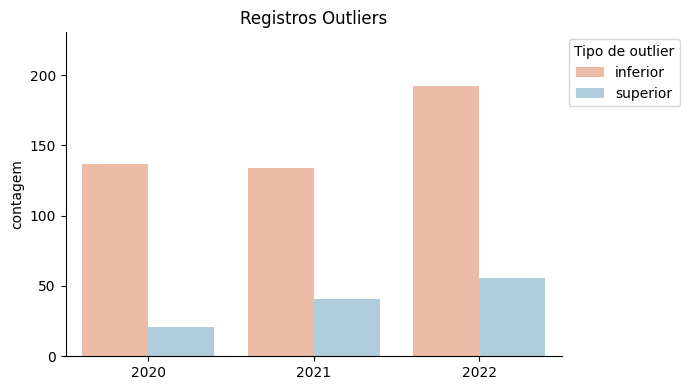

In [121]:
# Outliers por Ano
outliers_count = outliers_df.groupby(['outlier_tipo', 'ano']).size().reset_index()

fig, ax = plt.subplots(figsize=(7, 4))
sns.barplot(data=outliers_count, x='ano', y=0, hue='outlier_tipo', ax=ax, palette='RdBu', errorbar=None)
ax.set_title('Registros Outliers')
ax.set_xlabel('')
ax.set_ylabel('contagem')
ax.set_ylim(0, outliers_count[0].max() * 1.2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(title='Tipo de outlier', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

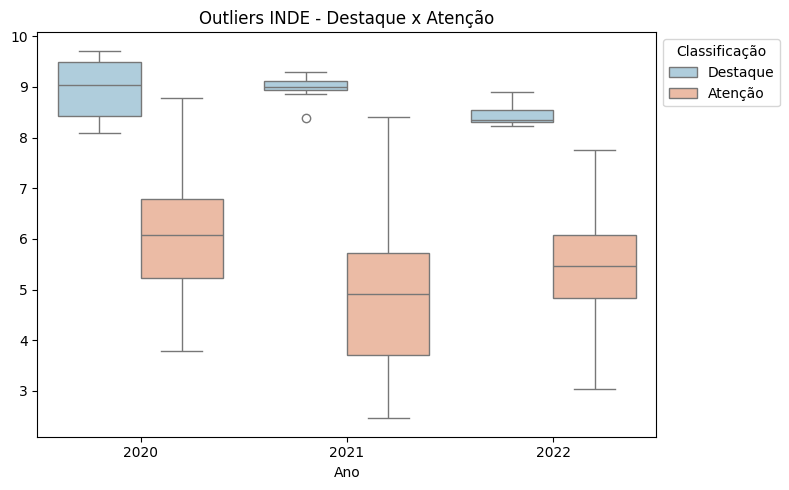

In [89]:
df['atencao_destaque'] = np.where(df['atencao'] == 1, 'Atenção', np.where(df['destaque'] == 1, 'Destaque', ''))

# Plotar INDE x ano x atenção/destaque
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df.query('atencao_destaque != ""'), 
            x='ano', y='inde', hue='atencao_destaque', palette='RdBu_r', ax=ax)
plt.title('Outliers INDE - Destaque x Atenção', fontsize=12)
plt.xlabel('Ano')
plt.ylabel('')
plt.legend(title='Classificação', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

6 alunos têm INDE acima da mediana geral, mas não se avaliam bem (IAA baixo). Esse é um indicativo de que o aluno precisa de ajuda em algum sentido, seja por estar se cobrando demais ou passando por alguma situação de dificuldade.

In [90]:
# Alunos com INDE acima da mediana e que são outliers para o IAA
mediana_inde = df.inde.median()
print(f'Mediana do INDE: {mediana_inde:.2f}')

# Existem 6 alunos que são outliers inferiores para o IAA e que possuem INDE acima da mediana
outliers_df.query('inde > @mediana_inde and indicador_outlier == "iaa" and outlier_tipo == "inferior"').shape[0]

Mediana do INDE: 7.28


6

Alunos com Índice de Desenvolvimento Acadêmico (IDA) acima da mediana geral e com Índice de Adequação de Nível (IAN) baixo indicam que o aluno tem boa performance estudantil para a fase em que está, mesmo com as dificuldades enfrentadas pela defasagem de idade em relação à fase de ensino. 

De mesmo modo, IDA abaixo da mediana geral e IAN baixo indica que o aluno precisa de maior atenção, pois pode estar com dificuldades e pode ser ainda mais afetado emocionalmente pela defasagem entre idade e fase de ensino.

In [91]:
mediana_ida = df.ida.median()
print(f'Mediana do IDA: {mediana_ida:.2f}')

# Existem 5 alunos que são outliers inferiores para o IDA e que possuem IAA acima da mediana
outliers_df.query('ida > @mediana_ida and indicador_outlier == "ian" and outlier_tipo == "inferior"').shape[0]

Mediana do IDA: 6.33


5

In [92]:
# IDA baixo e IAN alto
outliers_df.query('ida < @mediana_ida and indicador_outlier == "ian" and outlier_tipo == "superior"').shape[0]

26